In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import tensorflow as tf

from tensorflow import keras
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report, silhouette_score, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

%config InlineBackend.figure_format = 'retina'

C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\matplotlib_inline\config.py:68: DeprecationWarning: InlineBackend._figure_format_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_format_changed(self, name, old, new):


# **Đọc dữ liệu**

In [2]:
df = pd.read_csv("cancer.csv", index_col='index')
df

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
index,,,,,,,,,,,,,,,,,,,,,
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P995,44,1,6,7,7,7,7,6,7,...,5,3,2,7,8,2,4,5,3,High
996,P996,37,2,6,8,7,7,7,6,7,...,9,6,5,7,2,4,3,1,4,High
997,P997,25,2,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High


# **Tiền xử lý dữ liệu**

In [3]:
# Index Column now refers to patient
df.drop("Patient Id", axis=1, inplace=True)

# Cleaning Column Names
df.rename(columns=str.lower, inplace=True)
df.rename(columns={col: col.replace(" ", "_") for col in df.columns}, inplace=True)


<h2>Kiểm tra thông tin giá trị</h2>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       1000 non-null   int64 
 1   gender                    1000 non-null   int64 
 2   air_pollution             1000 non-null   int64 
 3   alcohol_use               1000 non-null   int64 
 4   dust_allergy              1000 non-null   int64 
 5   occupational_hazards      1000 non-null   int64 
 6   genetic_risk              1000 non-null   int64 
 7   chronic_lung_disease      1000 non-null   int64 
 8   balanced_diet             1000 non-null   int64 
 9   obesity                   1000 non-null   int64 
 10  smoking                   1000 non-null   int64 
 11  passive_smoker            1000 non-null   int64 
 12  chest_pain                1000 non-null   int64 
 13  coughing_of_blood         1000 non-null   int64 
 14  fatigue                  

<h2>Kiểm tra ngoại lệ

c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:136: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  scout = method([], [], **kws)
c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:136: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  scout = method([], [], **kws)
c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:700: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  artists = ax.bxp(**boxplot_kws)
c:\Users\admin\AppData\Local\Progra

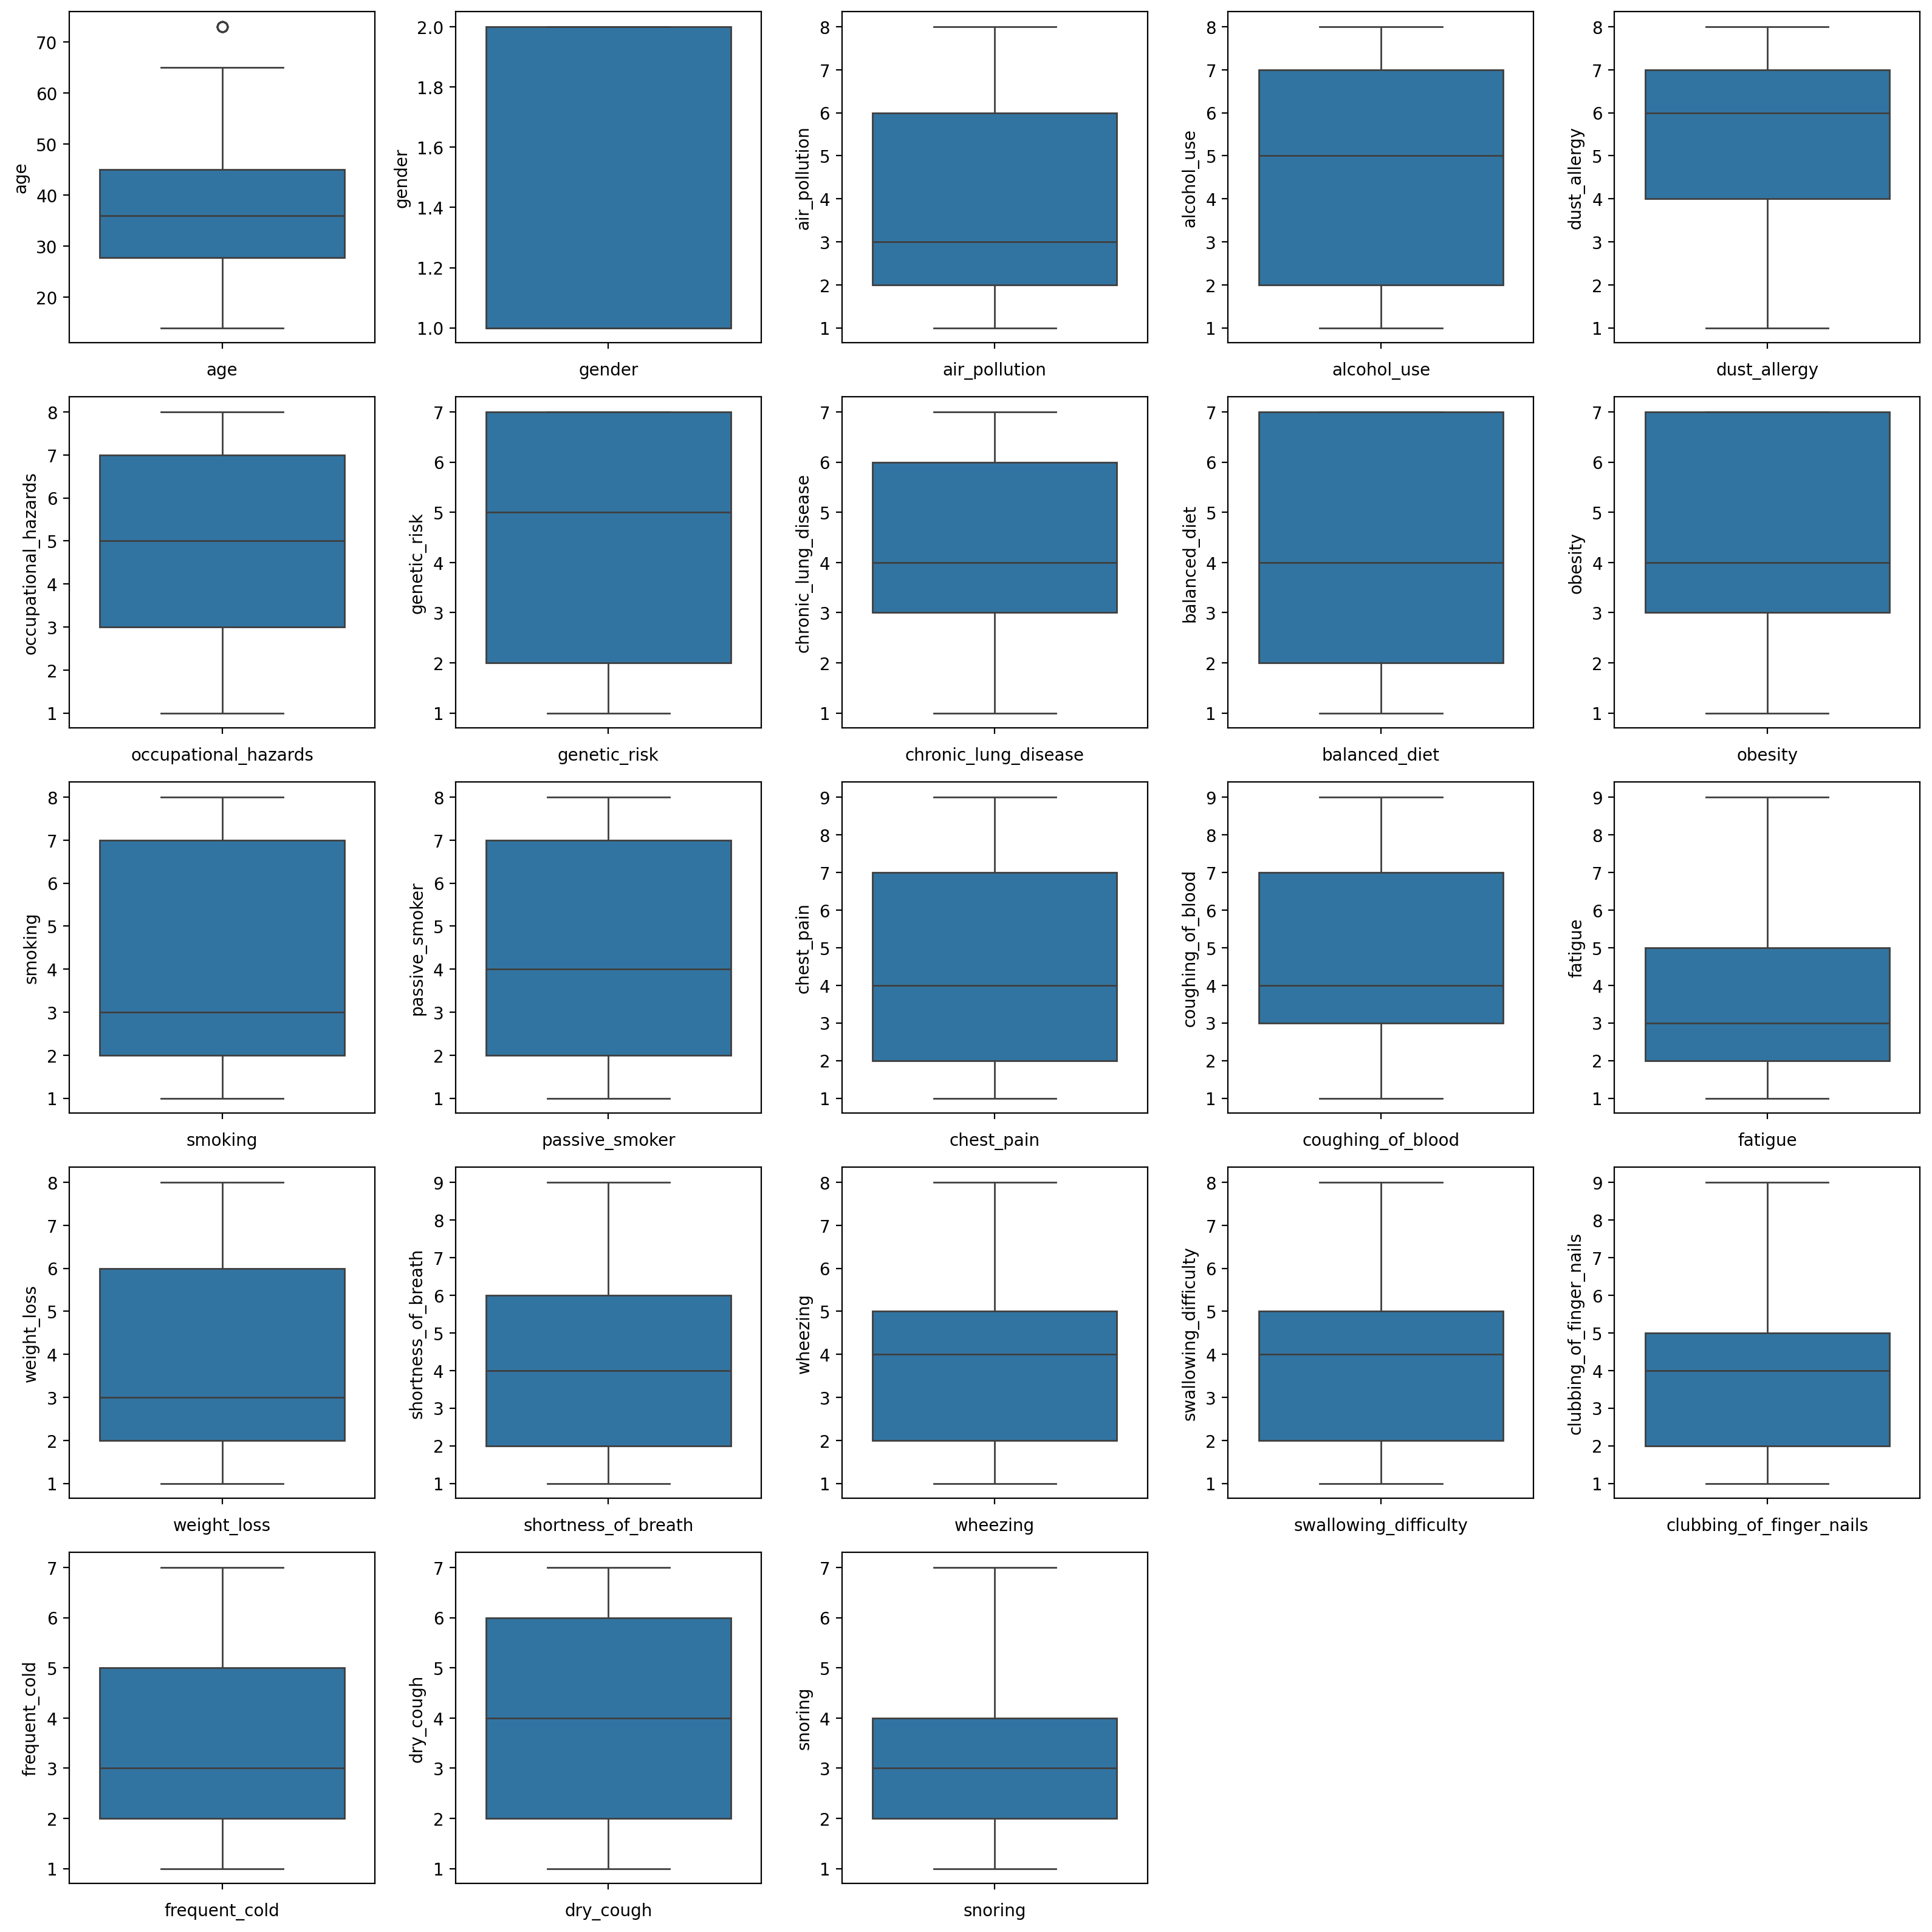

In [5]:
plt.figure(figsize=(16, 16))

for i, j in enumerate(df.select_dtypes(include="number").columns):
    plt.subplot(5, 5, i+1)
    sns.boxplot(df[j])
    plt.xlabel("{}".format(j))

plt.tight_layout()
plt.show()

<h2>Chuẩn hóa cột level

In [6]:
le = LabelEncoder()
df["level"] = le.fit_transform(df["level"])

# **Trực quan hóa dữ liệu**

In [7]:
# gom nhóm các thuộc tính

# yếu tố tự nhiên
cols = ['age', 'gender', 'genetic_risk']

# yếu tố sức khỏe
cols1 = [
    'chronic_lung_disease',     # bệnh phổi mãn tính
    'balanced_diet',            # chế độ ăn cân bằng
    'obesity',                  # béo phì
    'chest_pain',               # đau ngực
    'coughing_of_blood',        # ho ra máu
    'fatigue',                  # mệt mỏi
    'weight_loss',              # giảm cân
    'shortness_of_breath',      # khó thở
    'wheezing',                 # khò khè
    'swallowing_difficulty',    # khó nuốt
    'clubbing_of_finger_nails', # ngón tay dùi trống
    'frequent_cold',            # hay bị cảm lạnh
    'dry_cough',                # ho khan
    'snoring'                   # ngáy
]

# yếu tố xã hội
cols2 = [
    'air_pollution',        # ô nhiễm không khí
    'alcohol_use',          # sử dụng rượu
    'dust_allergy',         # dị ứng bụi
    'occupational_hazards', # nguy hiểm nghề nghiệp
    'smoking',              # hút thuốc
    'passive_smoker'        # hút thuốc thụ động
]

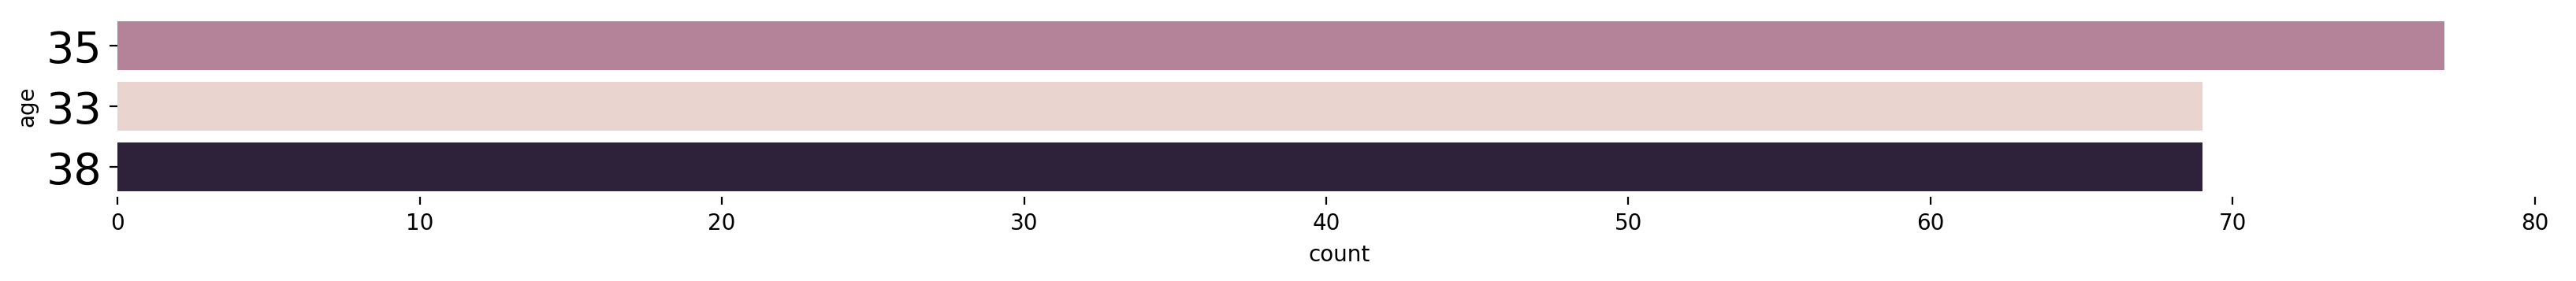

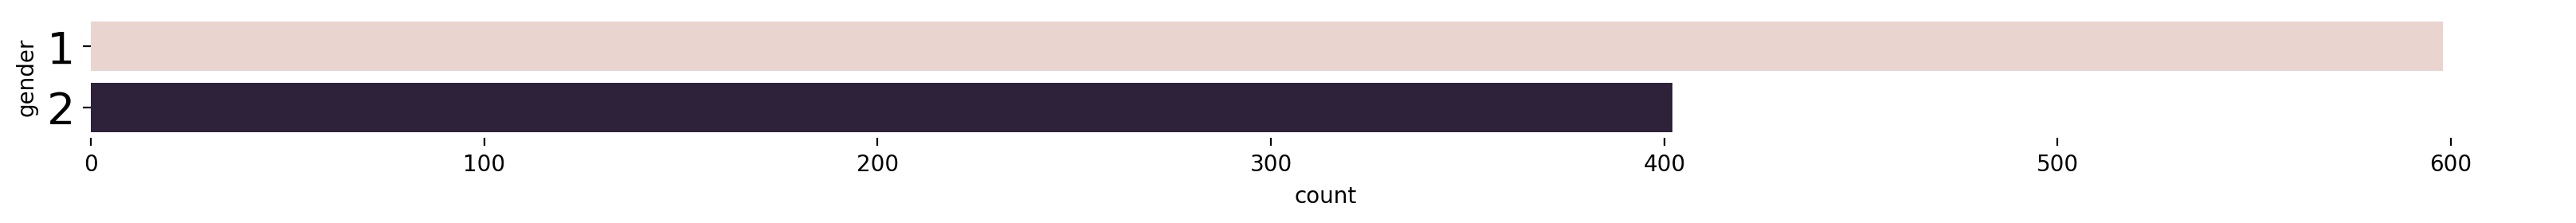

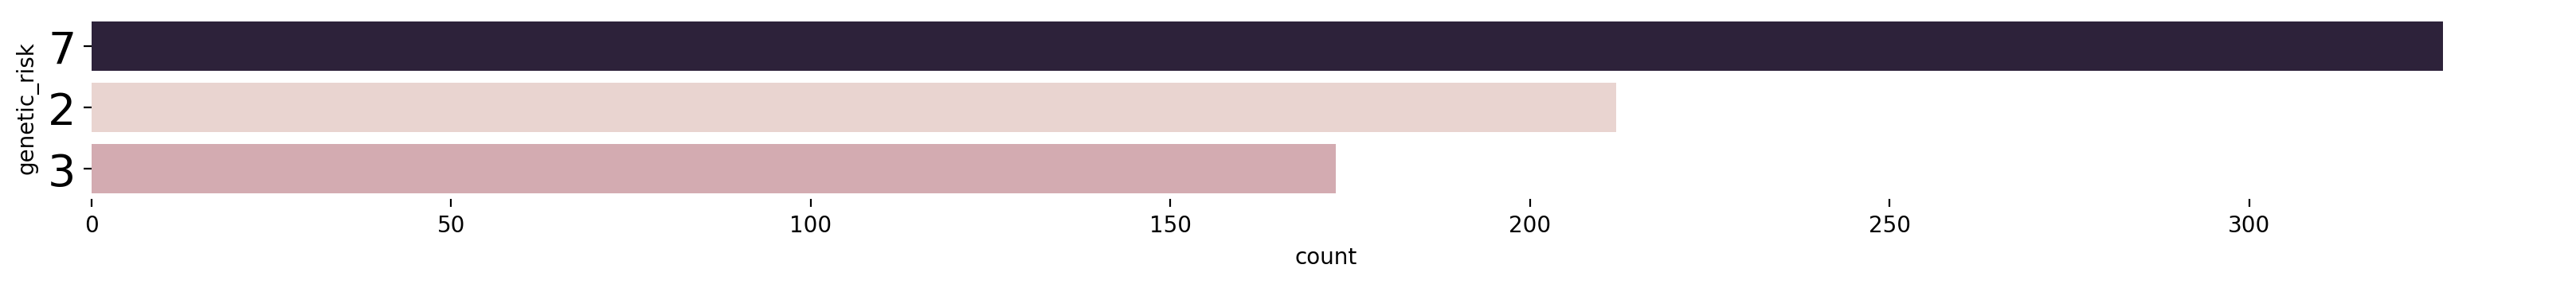

In [8]:
for i in cols:
  # Lấy top 5 giá trị phổ biến nhất
  top5_values = df[i].value_counts().nlargest(3).index
  top5_data = df[df[i].isin(top5_values)]
  
  # Tính toán chiều cao dựa trên số lượng giá trị duy nhất trong top 5
  num_unique_values = top5_data[i].nunique()
  height = num_unique_values * 0.5
  
  # Đặt figsize dựa trên chiều cao đã tính toán
  fig, ax = plt.subplots(1, 1, figsize=(20, height))
  
  sns.countplot(y=top5_data[i], hue=top5_data[i], data=top5_data, order=top5_data[i].value_counts().index, legend=False)
  plt.ylabel(i)
  plt.yticks(fontsize=20)
  plt.box(False)
  plt.show()

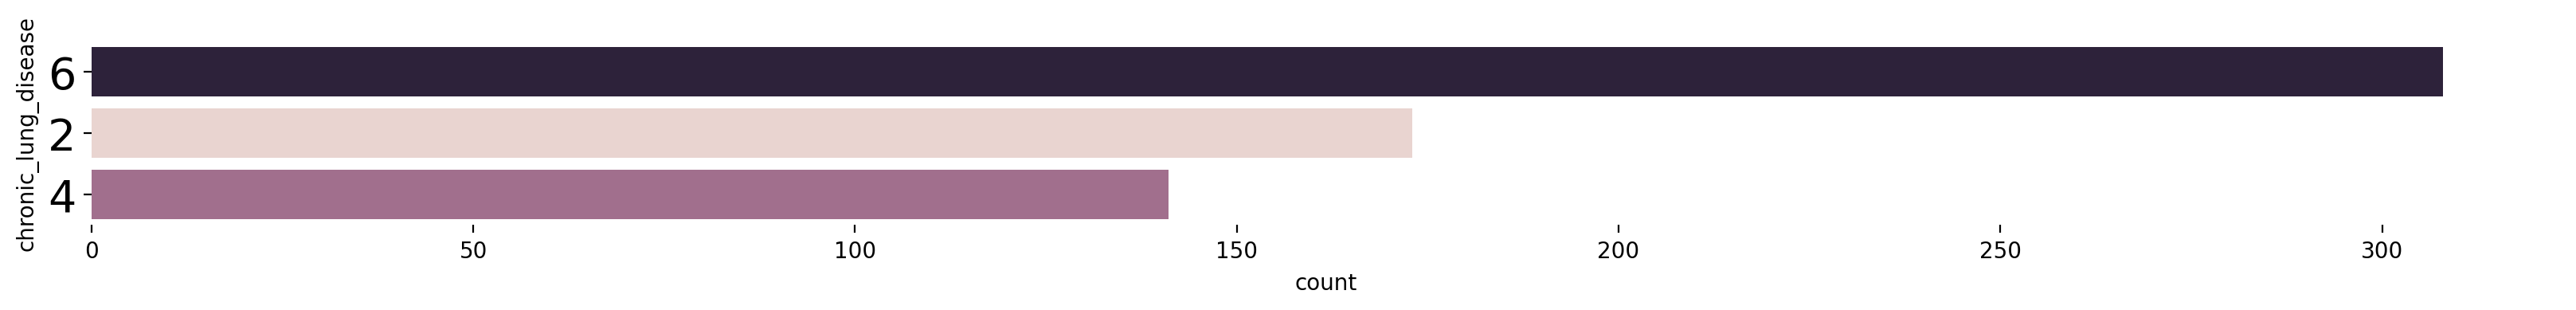

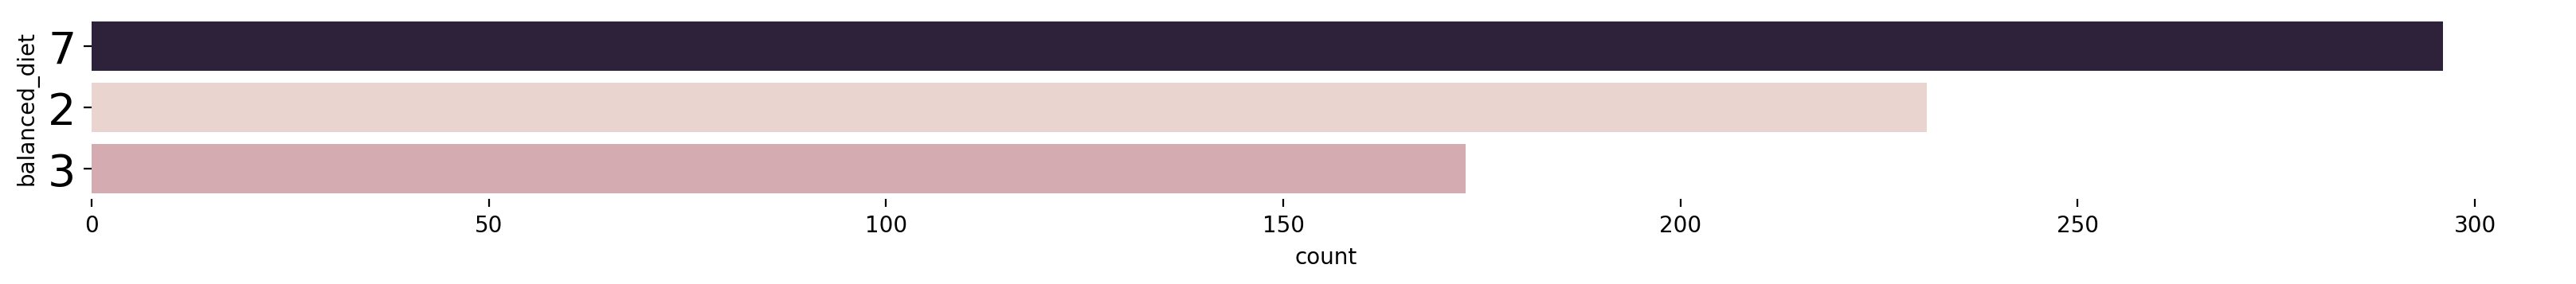

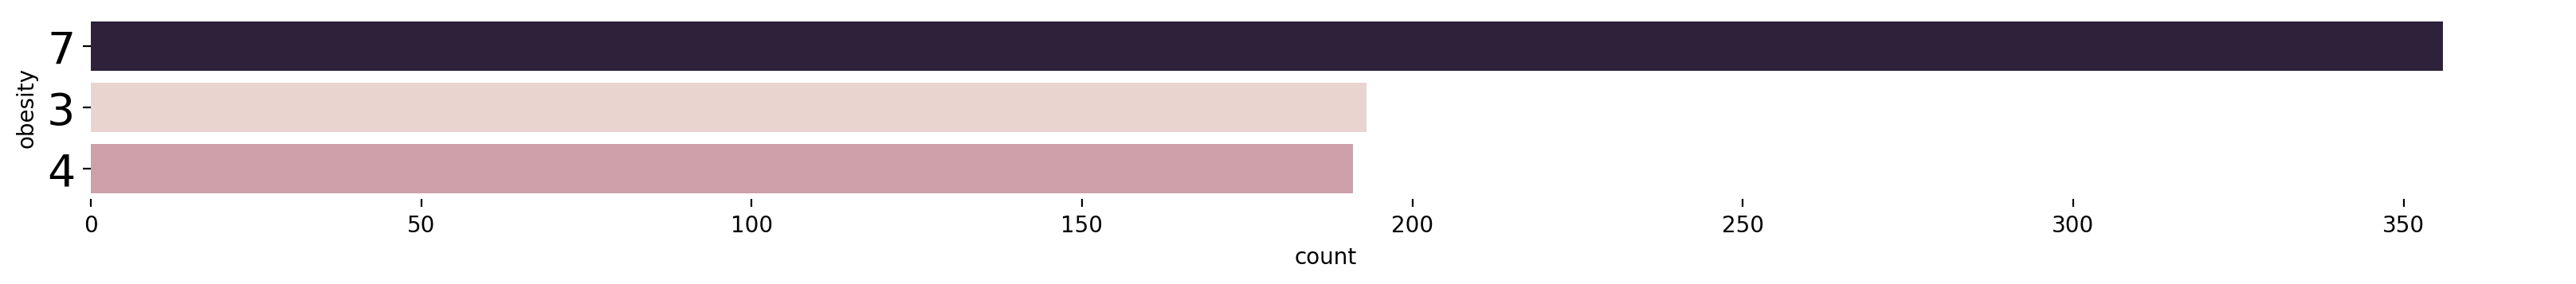

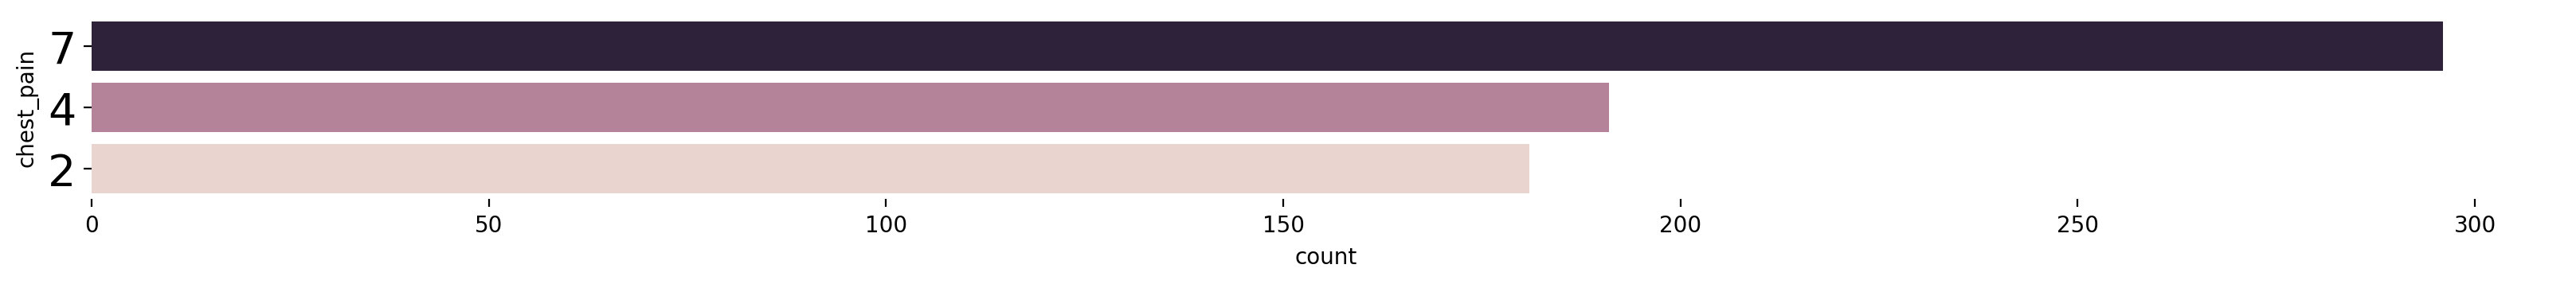

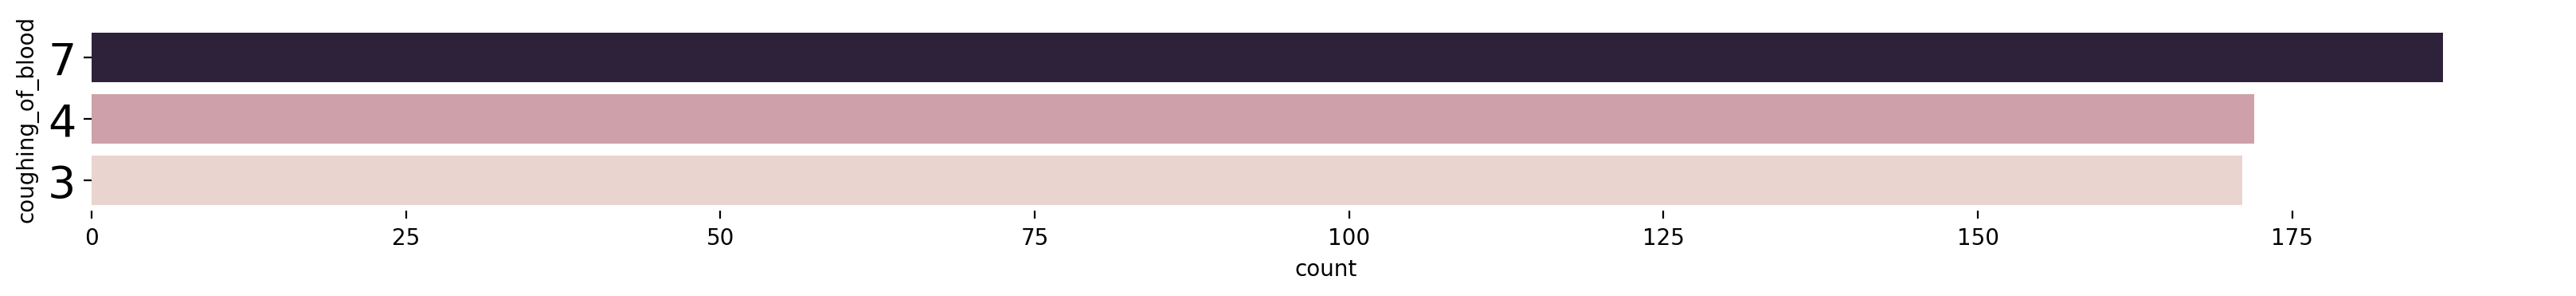

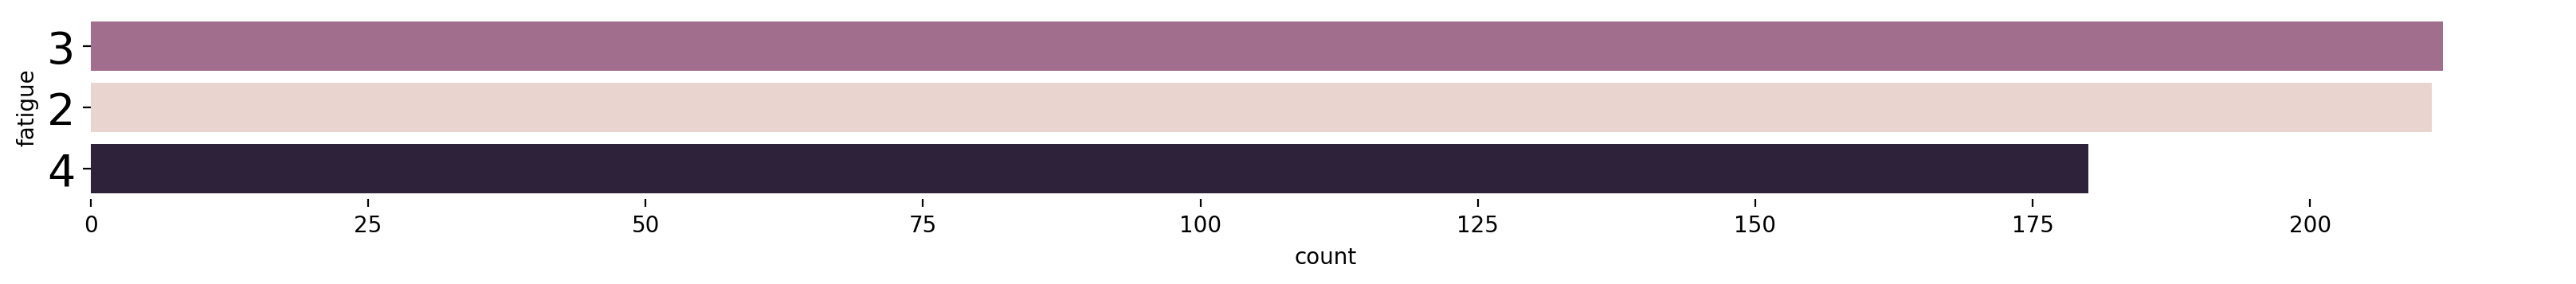

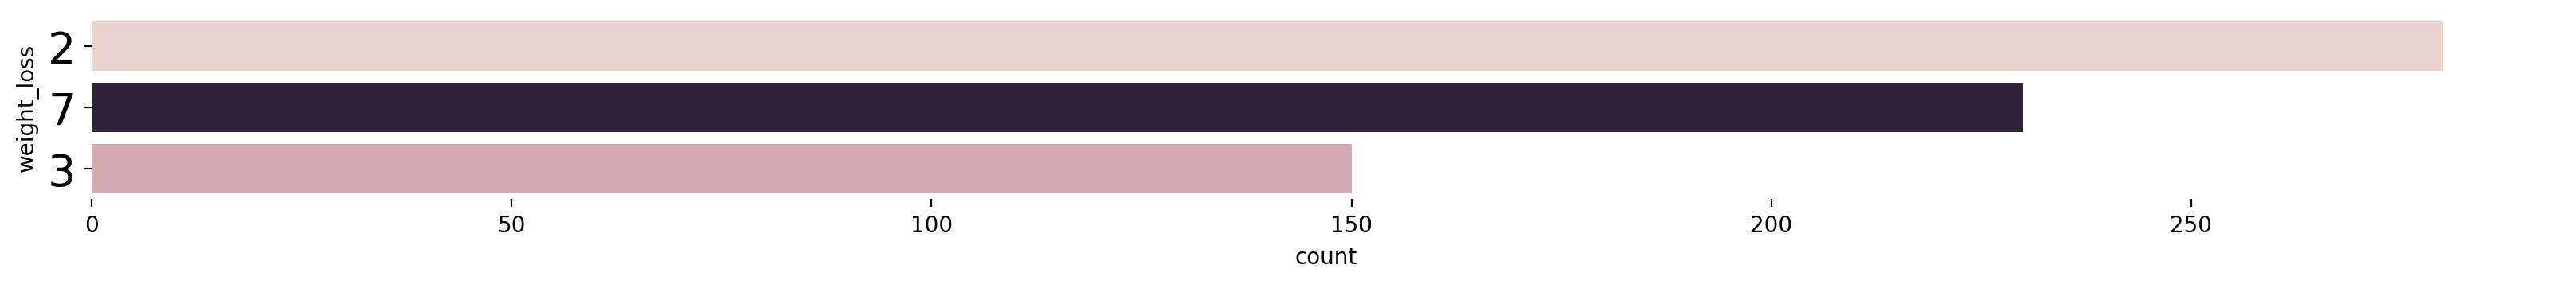

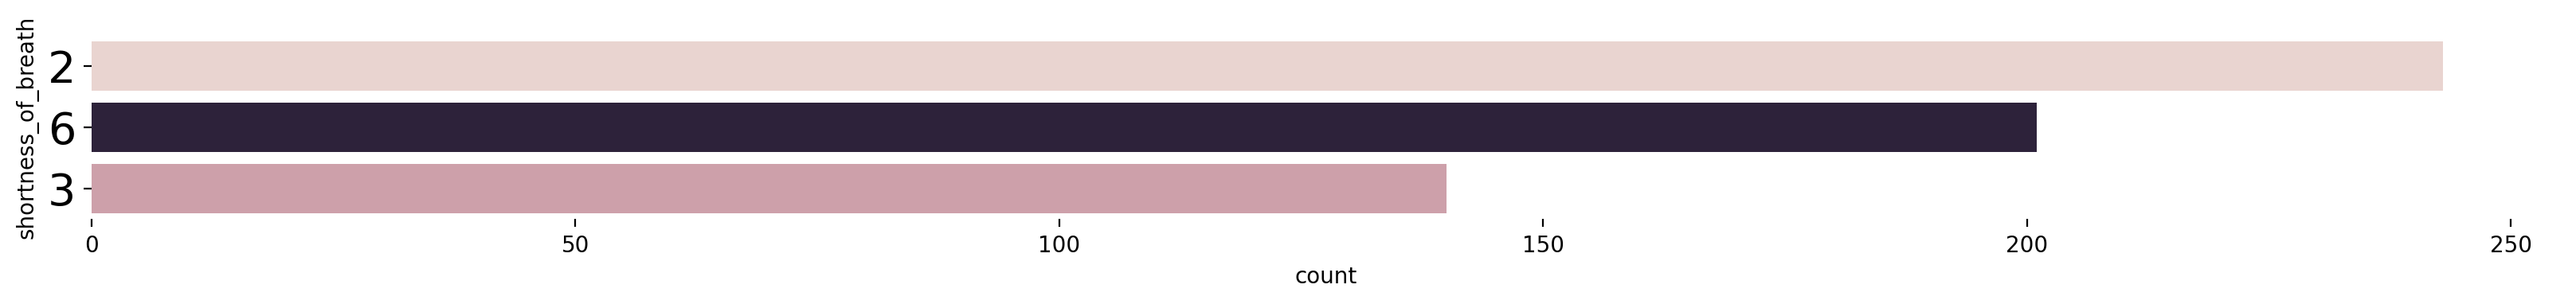

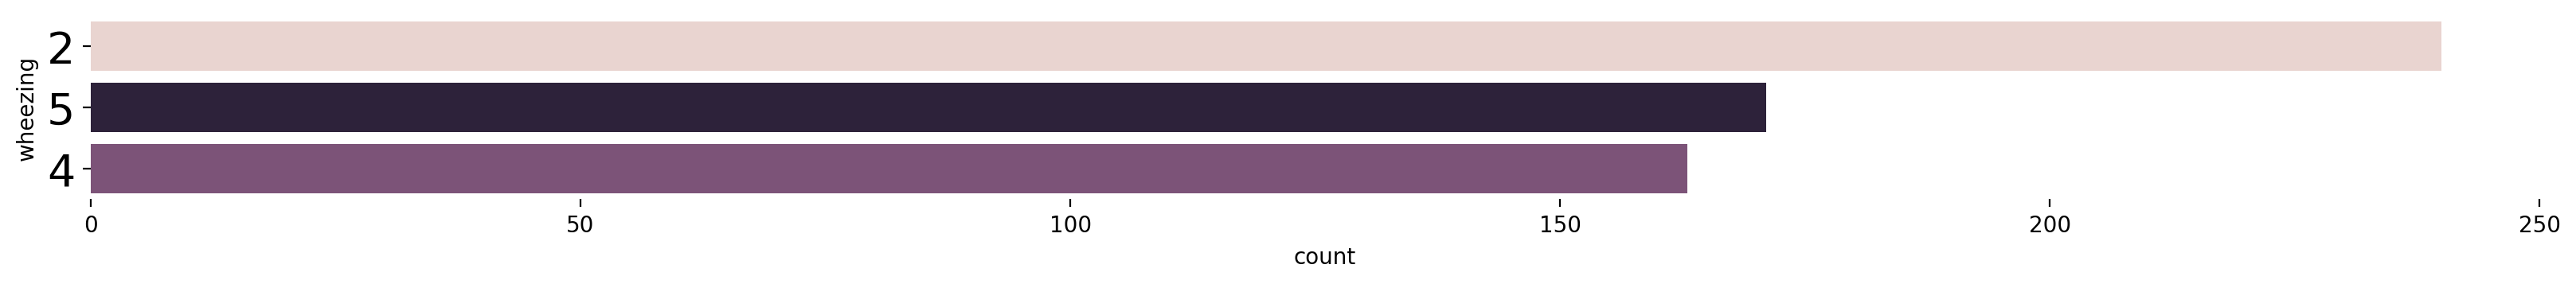

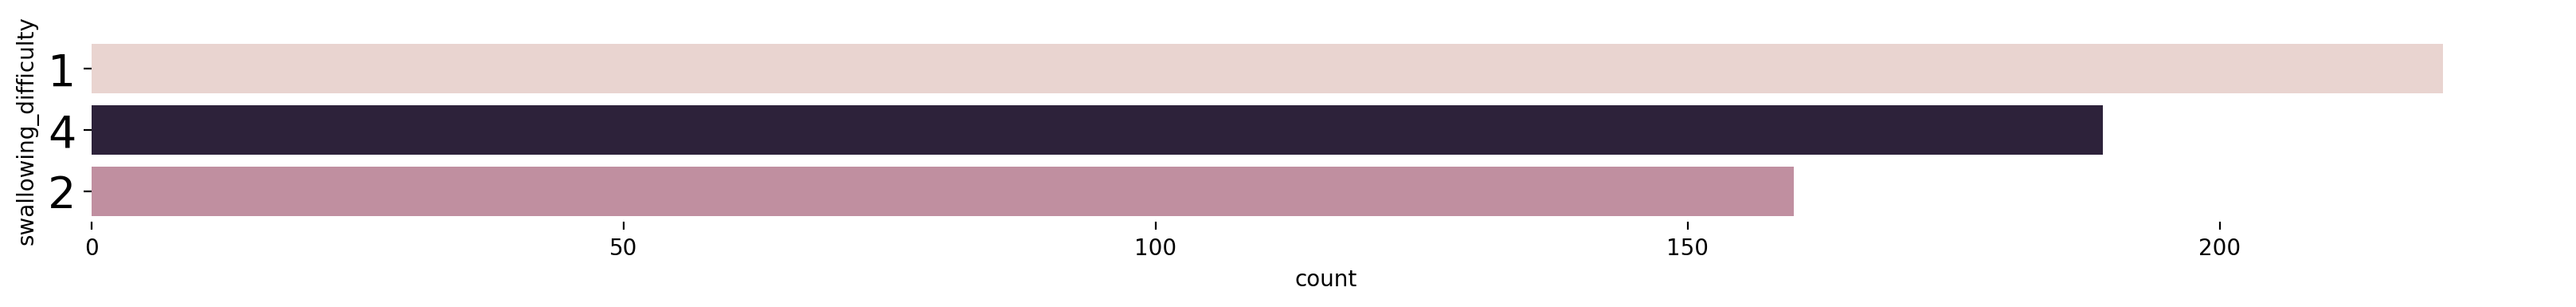

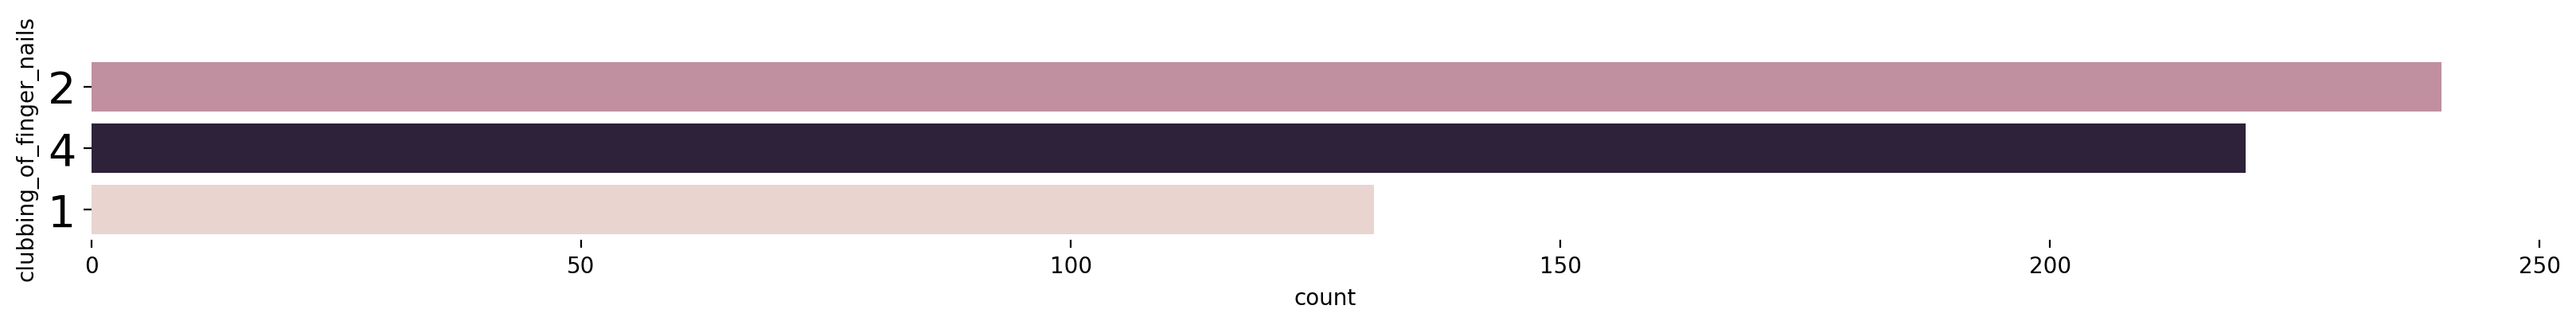

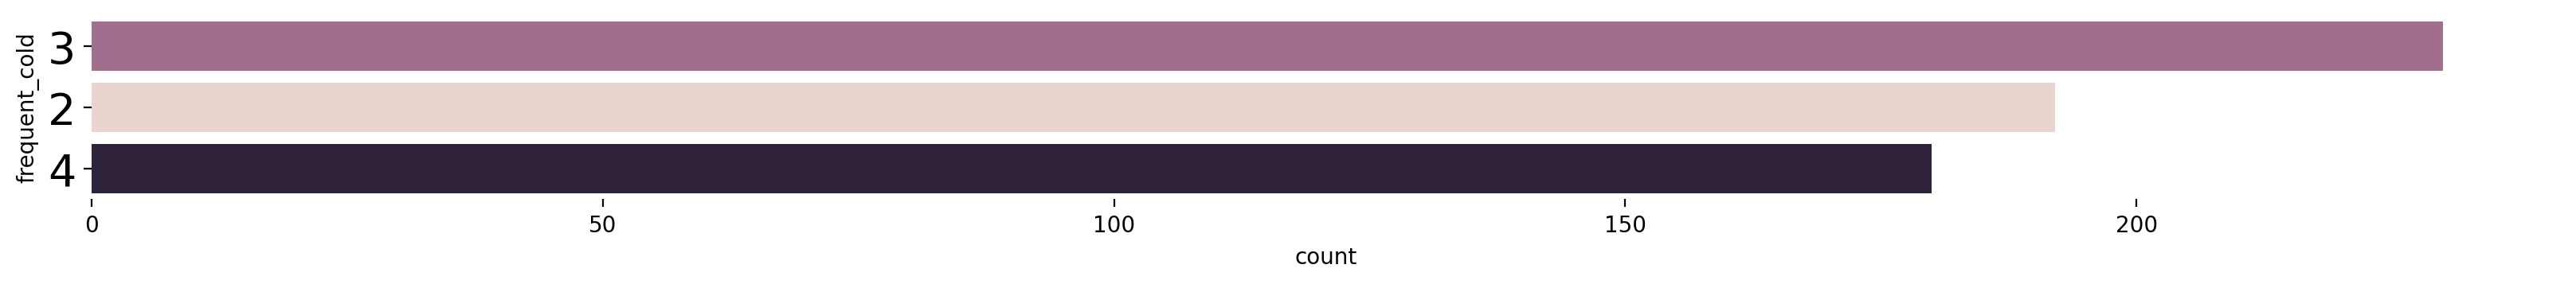

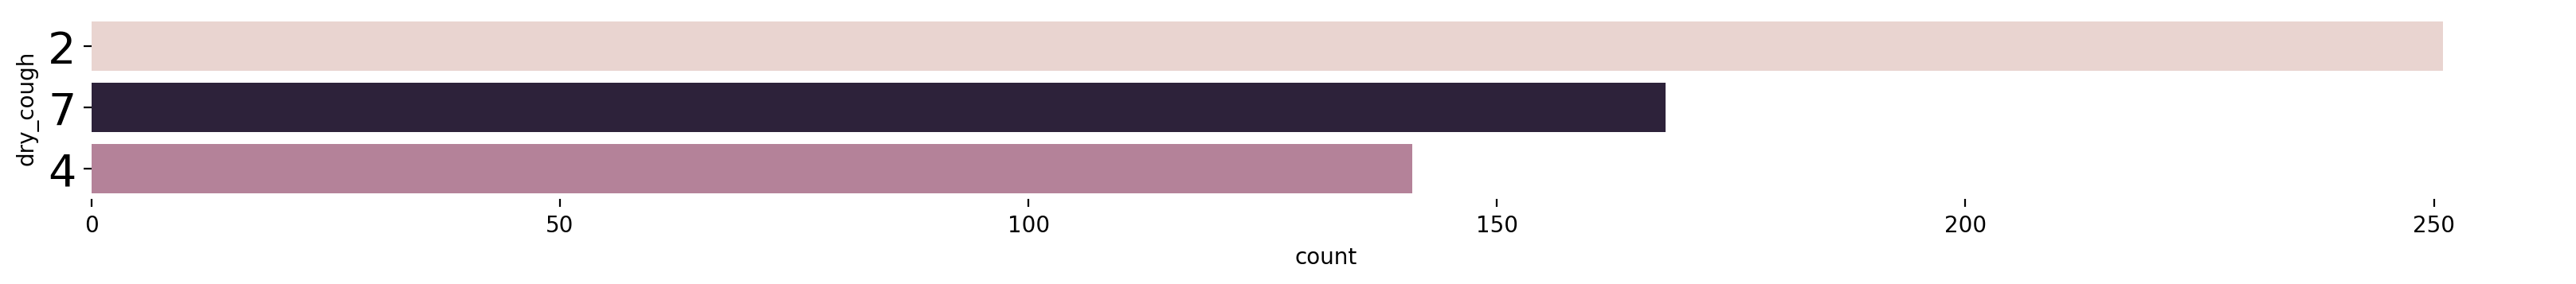

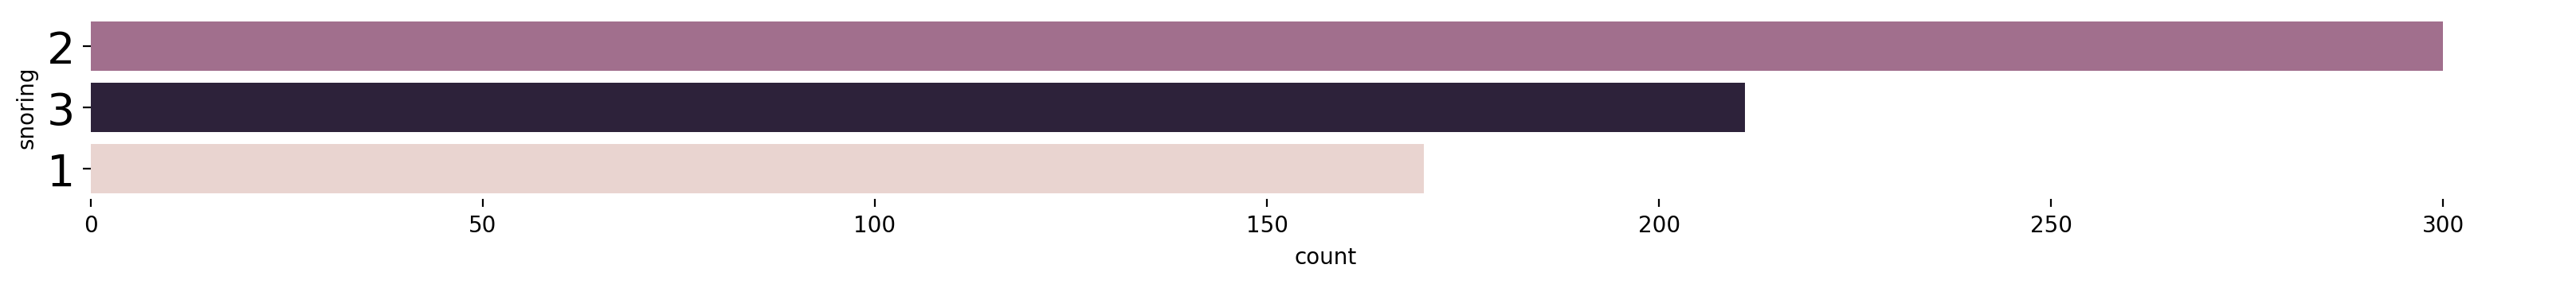

In [9]:
for i in cols1:
    # Lấy top 5 giá trị phổ biến nhất
    top5_values = df[i].value_counts().nlargest(3).index
    top5_data = df[df[i].isin(top5_values)]
    
    # Tính toán chiều cao dựa trên số lượng giá trị duy nhất trong top 5
    num_unique_values = top5_data[i].nunique()
    height = num_unique_values * 0.5
    
    # Đặt figsize dựa trên chiều cao đã tính toán
    fig, ax = plt.subplots(1, 1, figsize=(20, height))
    
    sns.countplot(y=top5_data[i], hue=top5_data[i], data=top5_data, order=top5_data[i].value_counts().index, legend=False)
    plt.ylabel(i)
    plt.yticks(fontsize=20)
    plt.box(False)
    plt.show()

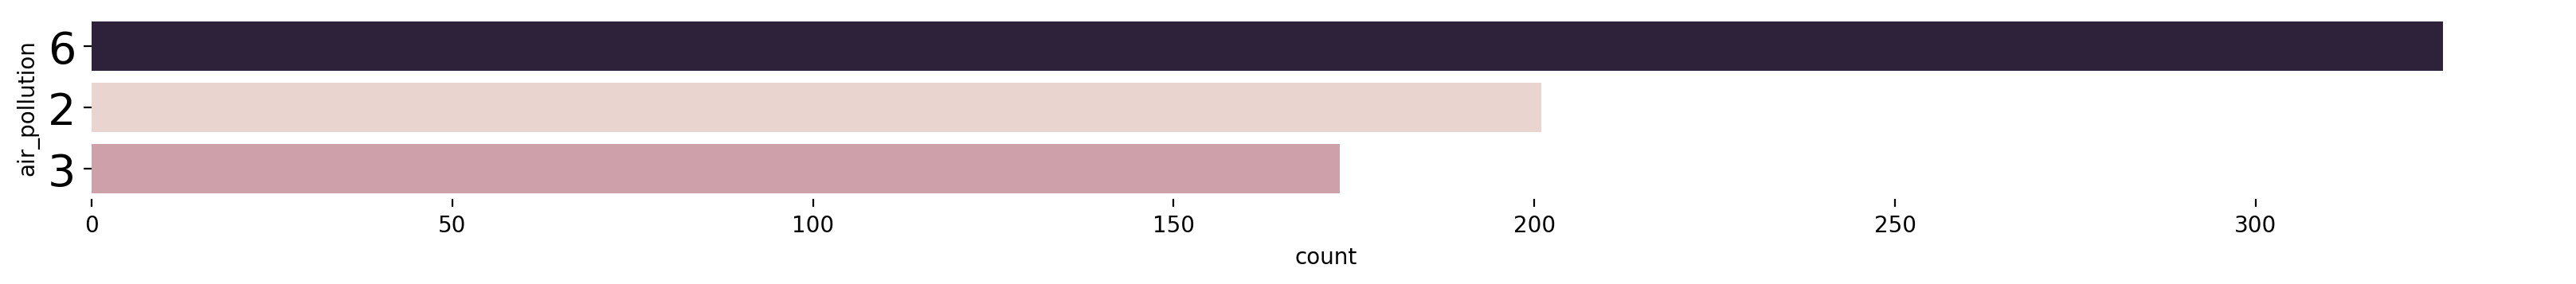

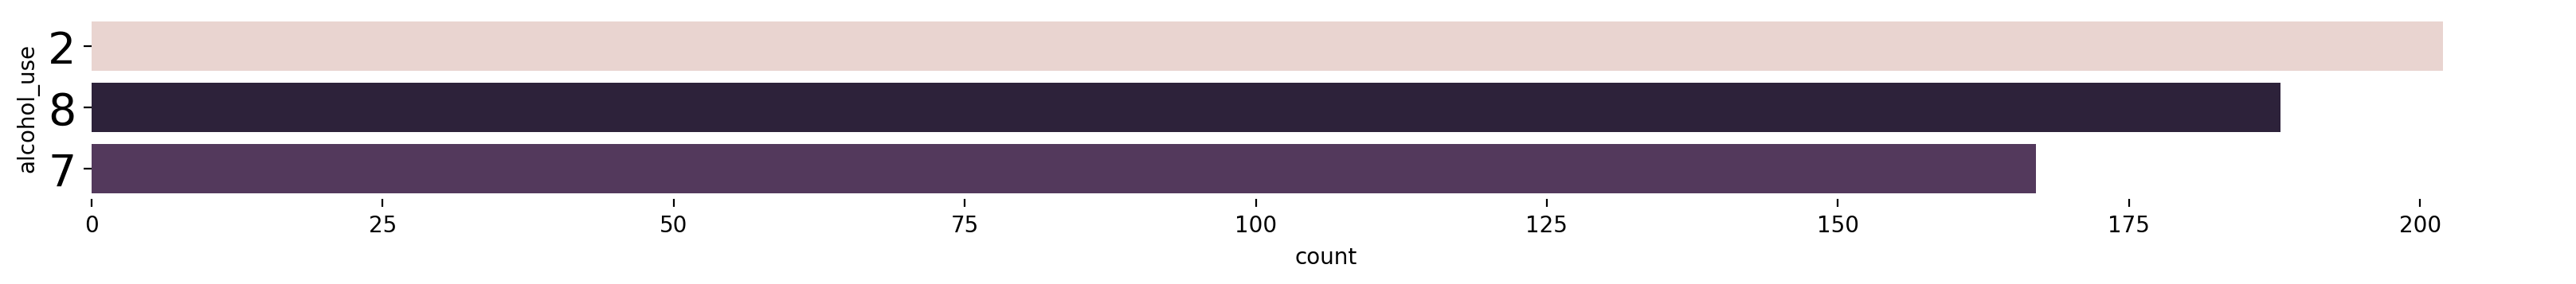

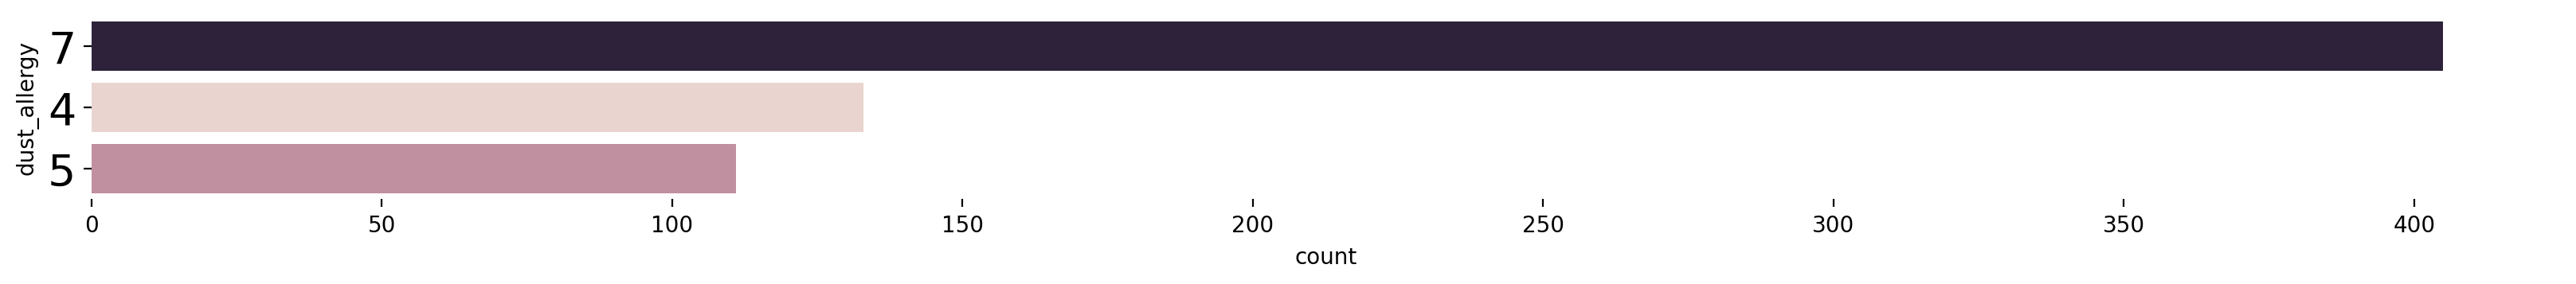

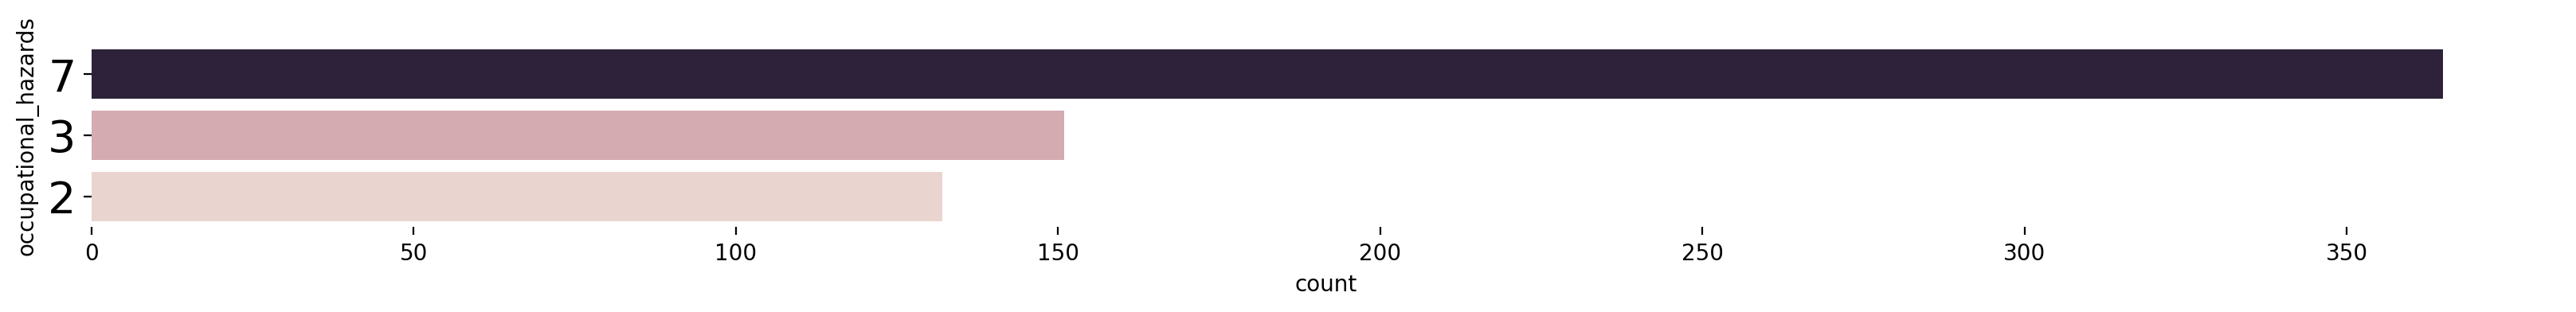

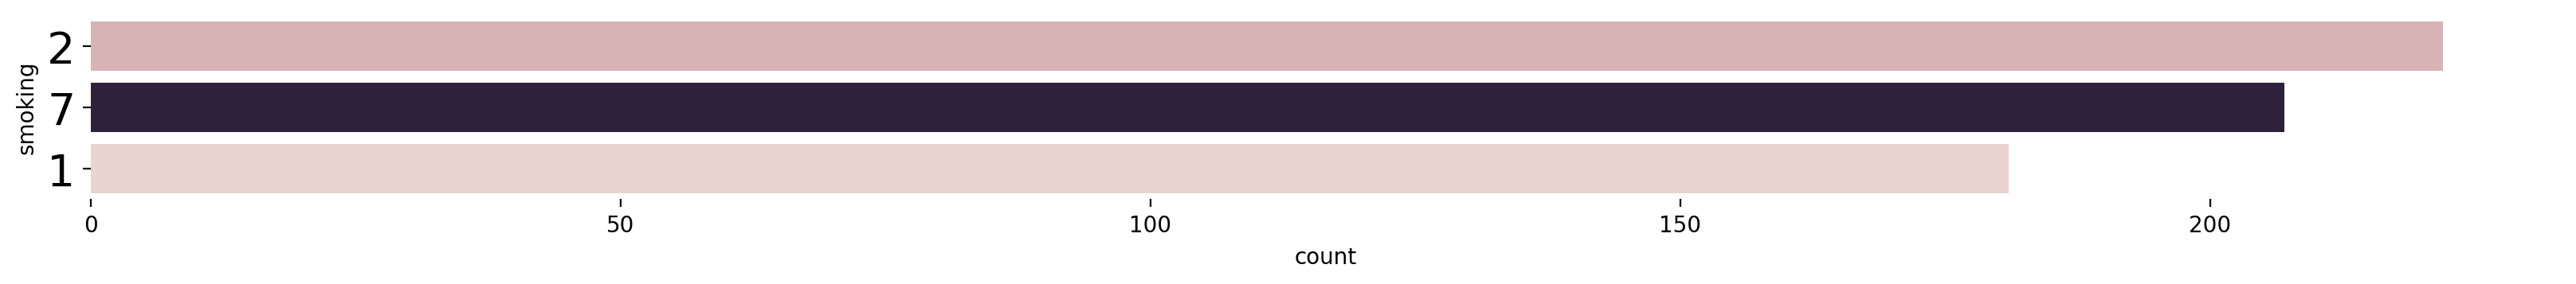

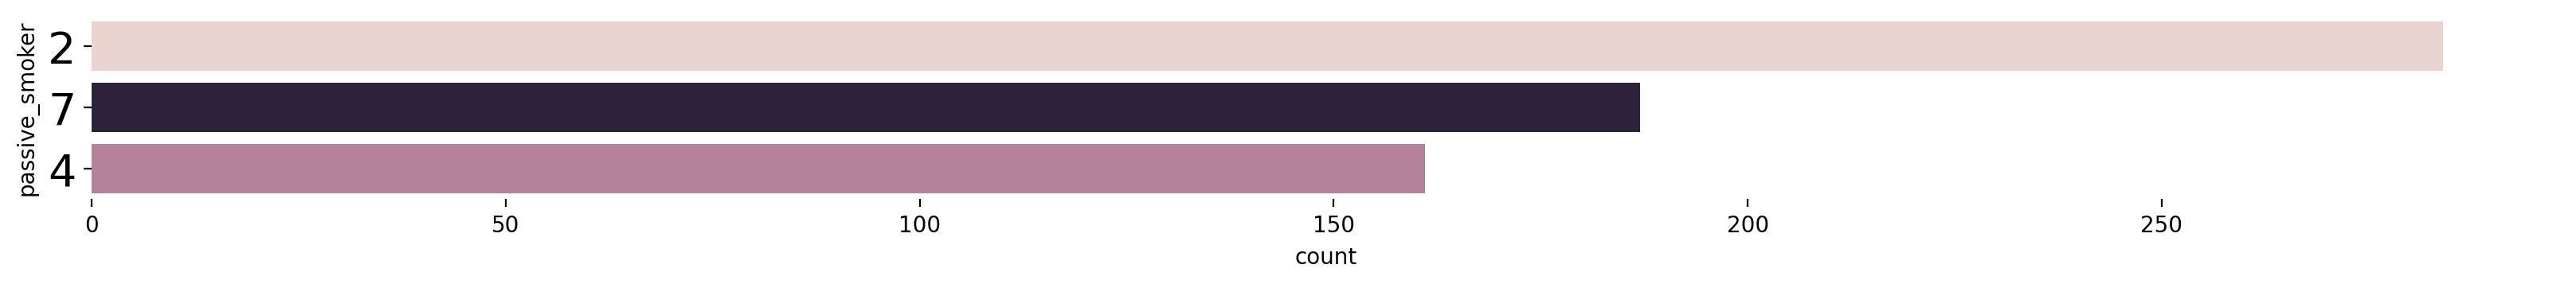

In [10]:
for i in cols2:
    # Lấy top 5 giá trị phổ biến nhất
    top5_values = df[i].value_counts().nlargest(3).index
    top5_data = df[df[i].isin(top5_values)]
    
    # Tính toán chiều cao dựa trên số lượng giá trị duy nhất trong top 5
    num_unique_values = top5_data[i].nunique()
    height = num_unique_values * 0.5
    
    # Đặt figsize dựa trên chiều cao đã tính toán
    fig, ax = plt.subplots(1, 1, figsize=(20, height))
    
    sns.countplot(y=top5_data[i], hue=top5_data[i], data=top5_data, order=top5_data[i].value_counts().index, legend=False)
    plt.ylabel(i)
    plt.yticks(fontsize=20)
    plt.box(False)
    plt.show()

<h2>Phân bố mức độ ung thư phổi

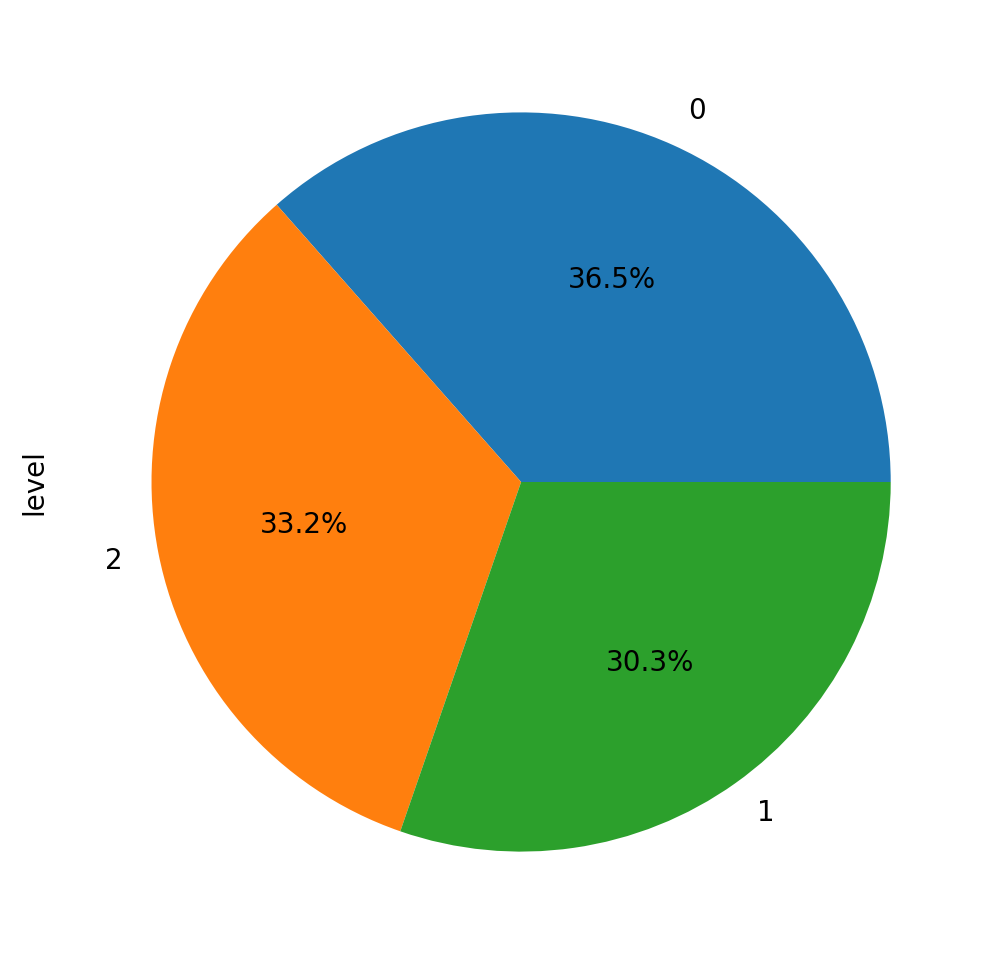

In [11]:

df['level'].value_counts().plot(kind='pie', figsize=(6, 6), autopct='%1.1f%%')
plt.show()

<h2>Mức độ ảnh hưởng của các yếu tố đối với ung thư phổi

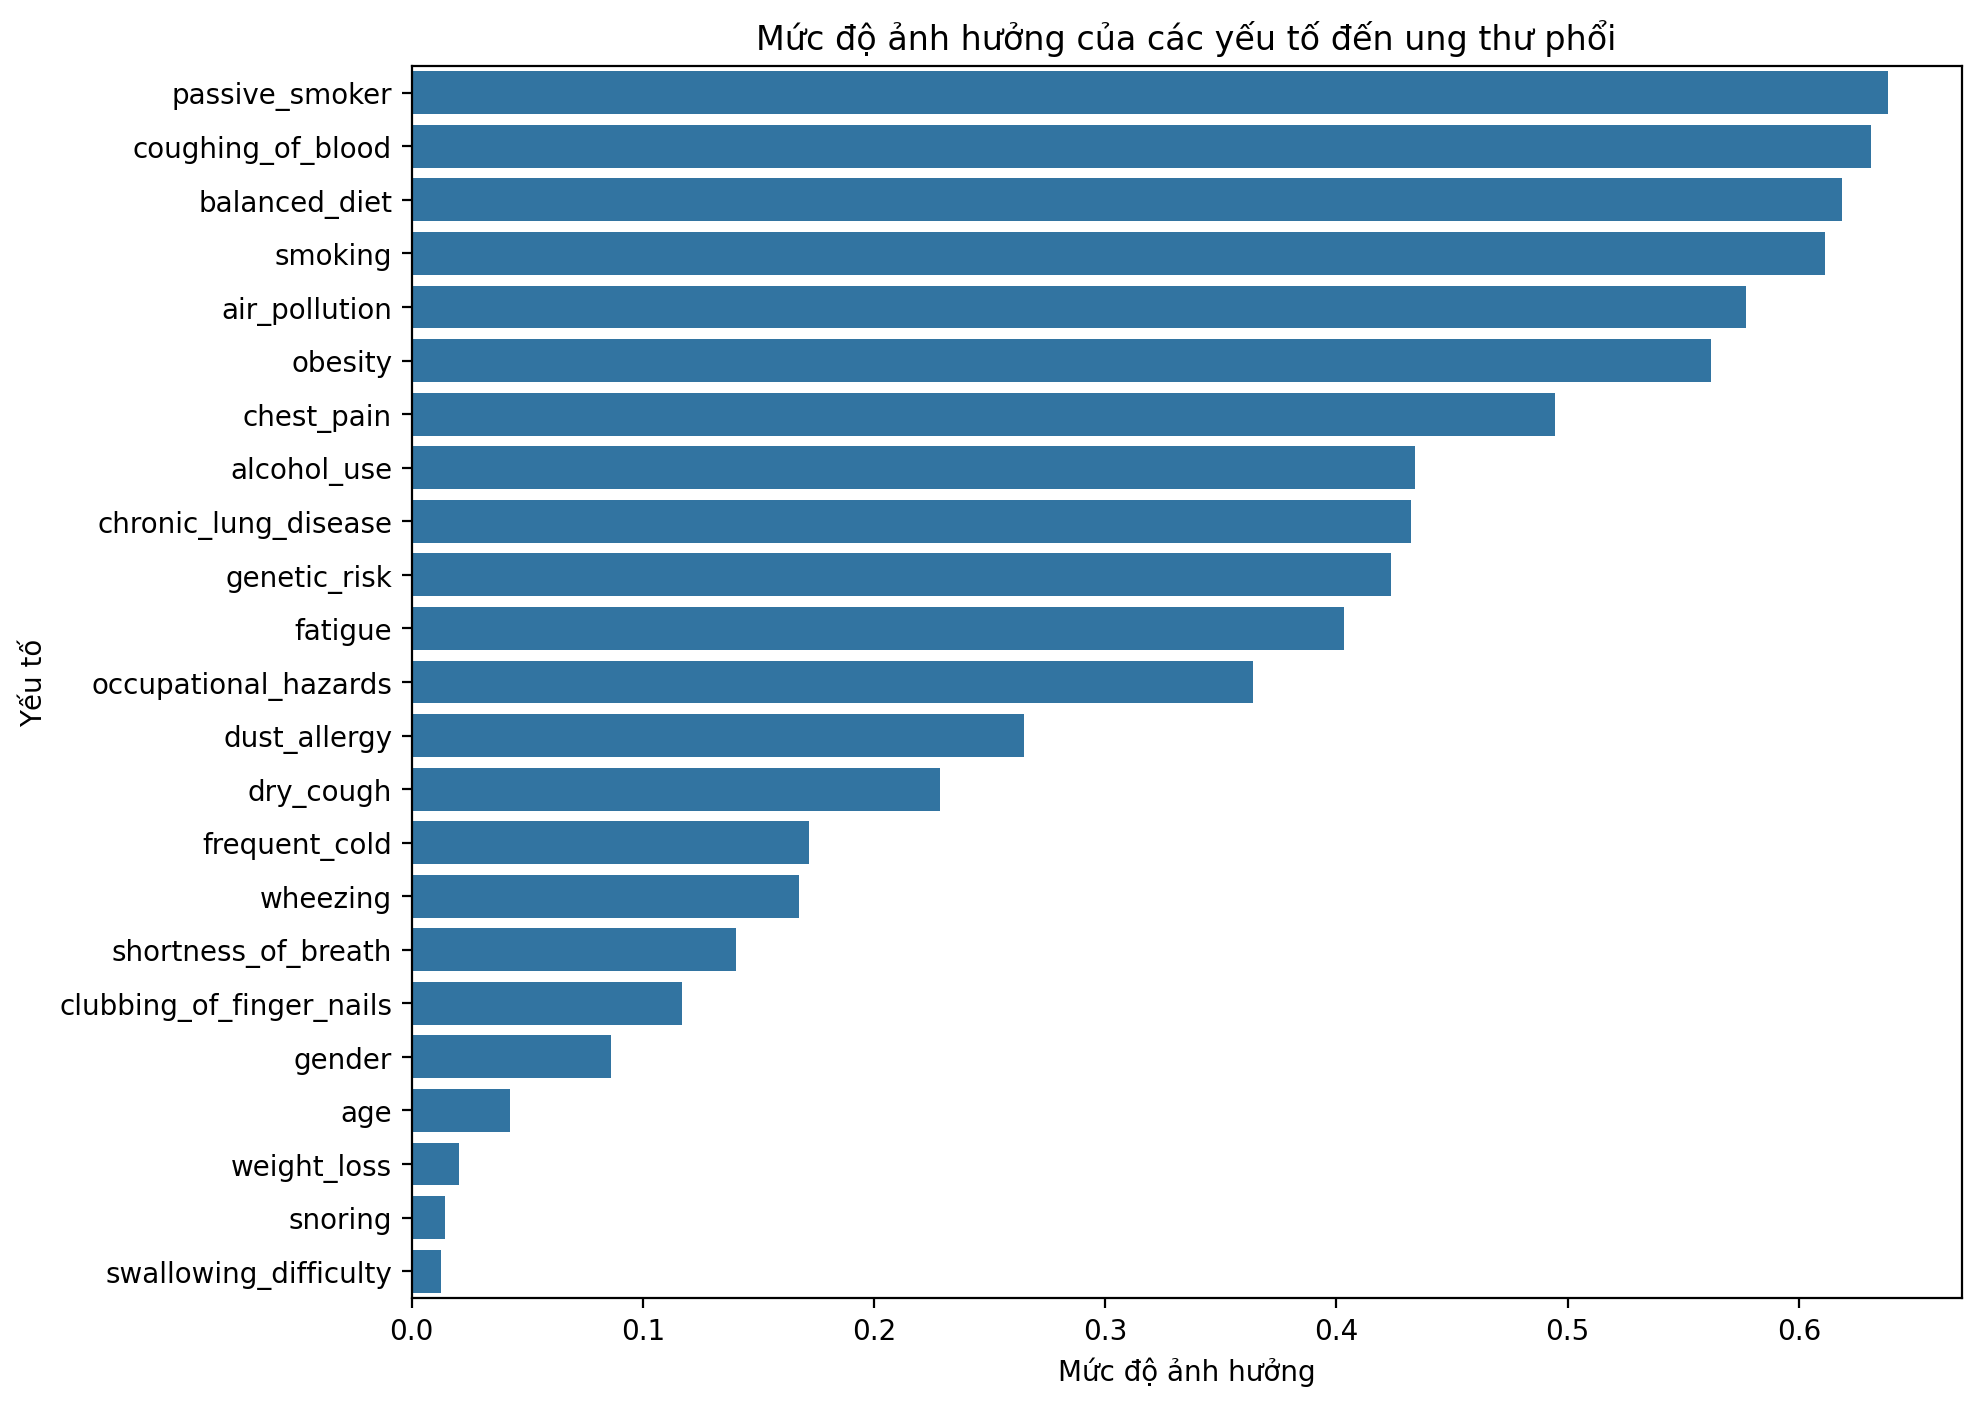

In [12]:
correlations = df.corr()['level'].drop('level')
correlations = correlations.abs().sort_values(ascending=False)

plt.figure(figsize=(10,8))
ax = sns.barplot(x=correlations.values, y=correlations.index)
ax.set_title('Mức độ ảnh hưởng của các yếu tố đến ung thư phổi')
ax.set_xlabel('Mức độ ảnh hưởng')
ax.set_ylabel('Yếu tố')
plt.show()


# **Huấn luyện mô hình**

In [13]:
X = df.drop(columns='level')
y = df.level

X.head(10)

,age,gender,air_pollution,alcohol_use,dust_allergy,occupational_hazards,genetic_risk,chronic_lung_disease,balanced_diet,obesity,...,coughing_of_blood,fatigue,weight_loss,shortness_of_breath,wheezing,swallowing_difficulty,clubbing_of_finger_nails,frequent_cold,dry_cough,snoring
index,,,,,,,,,,,,,,,,,,,,,
0,33,1,2,4,5,4,3,2,2,4,...,4,3,4,2,2,3,1,2,3,4
1,17,1,3,1,5,3,4,2,2,2,...,3,1,3,7,8,6,2,1,7,2
2,35,1,4,5,6,5,5,4,6,7,...,8,8,7,9,2,1,4,6,7,2
3,37,1,7,7,7,7,6,7,7,7,...,8,4,2,3,1,4,5,6,7,5
4,46,1,6,8,7,7,7,6,7,7,...,9,3,2,4,1,4,2,4,2,3
5,35,1,4,5,6,5,5,4,6,7,...,8,8,7,9,2,1,4,6,7,2
6,52,2,2,4,5,4,3,2,2,4,...,4,3,4,2,2,3,1,2,3,4
7,28,2,3,1,4,3,2,3,4,3,...,1,3,2,2,4,2,2,3,4,3
8,35,2,4,5,6,5,6,5,5,5,...,5,1,4,3,2,4,6,2,4,1


<h2>Train Test Split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

<h2>Chuẩn hóa dữ liệu

In [15]:
# scaler=StandardScaler()
# X_train_scaled=scaler.fit_transform(X_train)
# X_test_scaled=scaler.transform(X_test)

<h3>Logistic Regression

In [16]:
logreg = LogisticRegression(random_state = 0, n_jobs = -1)

logreg.fit(X_train, y_train)

y_predict1 = logreg.predict(X_test)

**Confusion Matrix**

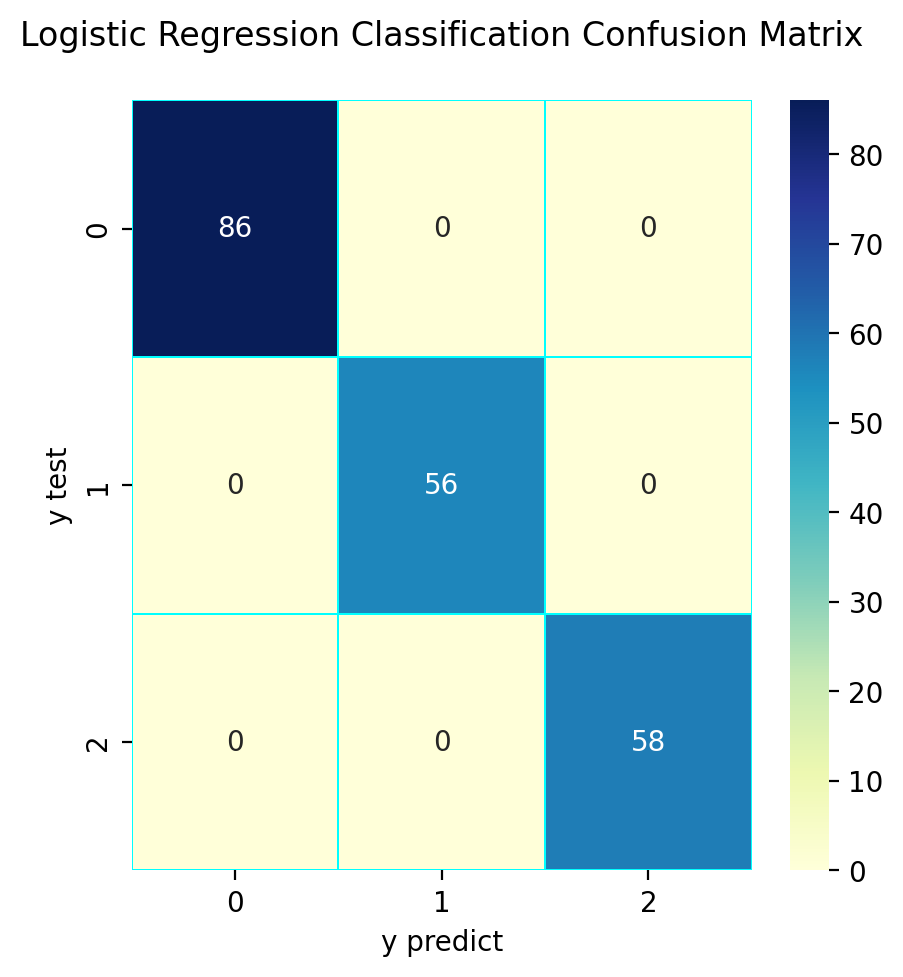

In [17]:
# Confusion Matrix

logreg_cm = confusion_matrix(y_test, y_predict1)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(logreg_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Logistic Regression Classification Confusion Matrix\n')
plt.xlabel('y predict')
plt.ylabel('y test')
plt.show()

**Test Score**

In [18]:
score_nbcla = logreg.score(X_test, y_test)
print('Logistic Regression Score = ',score_nbcla)

Logistic Regression Score =  1.0


In [19]:
print(classification_report(y_test, y_predict1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        86
           1       1.00      1.00      1.00        56
           2       1.00      1.00      1.00        58

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



<h3>Gaussian Naive Bayes

In [20]:
nbcla = GaussianNB()

nbcla.fit(X_train, y_train)

y_predict2 = nbcla.predict(X_test)

**Confusion Matrix**

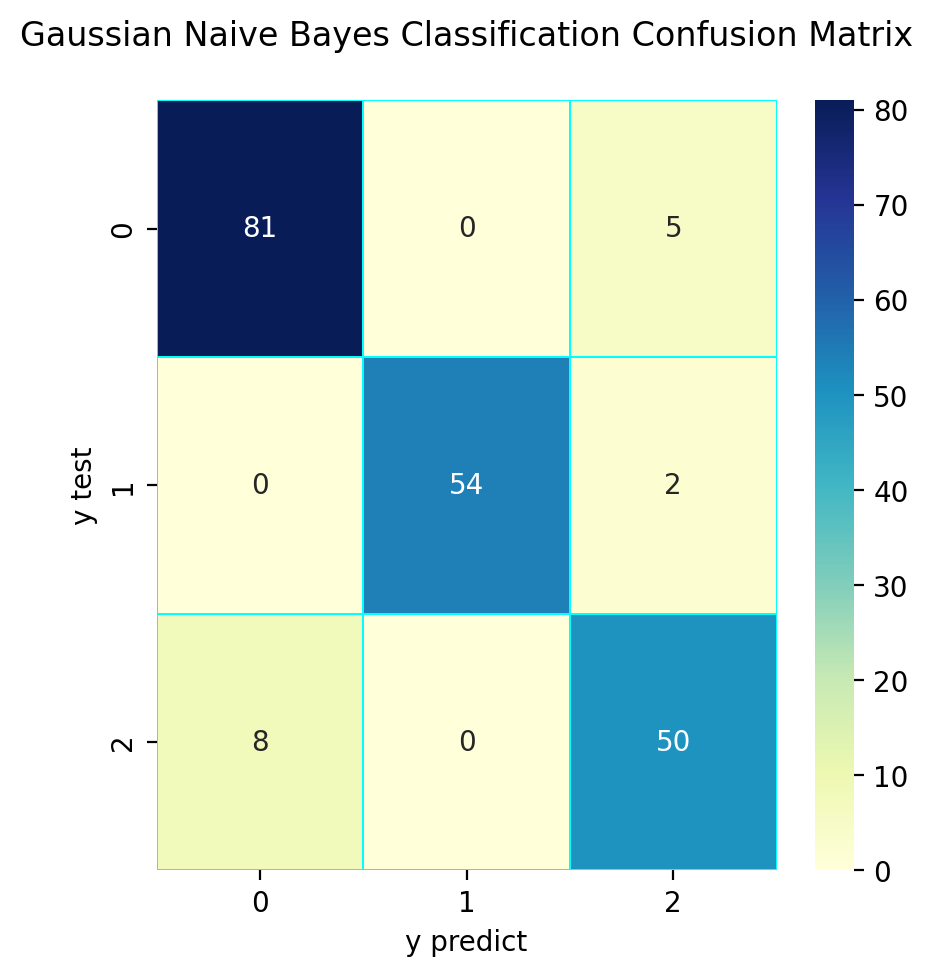

In [21]:
nbcla_cm = confusion_matrix(y_test, y_predict2)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(nbcla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Gaussian Naive Bayes Classification Confusion Matrix\n')
plt.xlabel('y predict')
plt.ylabel('y test')
plt.show()

**Test Score**

In [22]:
score_nbcla = nbcla.score(X_test, y_test)
print('Gaussian Naive Bayes Score = ',score_nbcla)

Gaussian Naive Bayes Score =  0.925


In [23]:
print(classification_report(y_test, y_predict2))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93        86
           1       1.00      0.96      0.98        56
           2       0.88      0.86      0.87        58

    accuracy                           0.93       200
   macro avg       0.93      0.92      0.93       200
weighted avg       0.93      0.93      0.93       200



# **Random Forest**

In [24]:
rf = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=9)
rf.fit(X_train, y_train)

y_predict_rf = rf.predict(X_test)

**Confusion matrix**

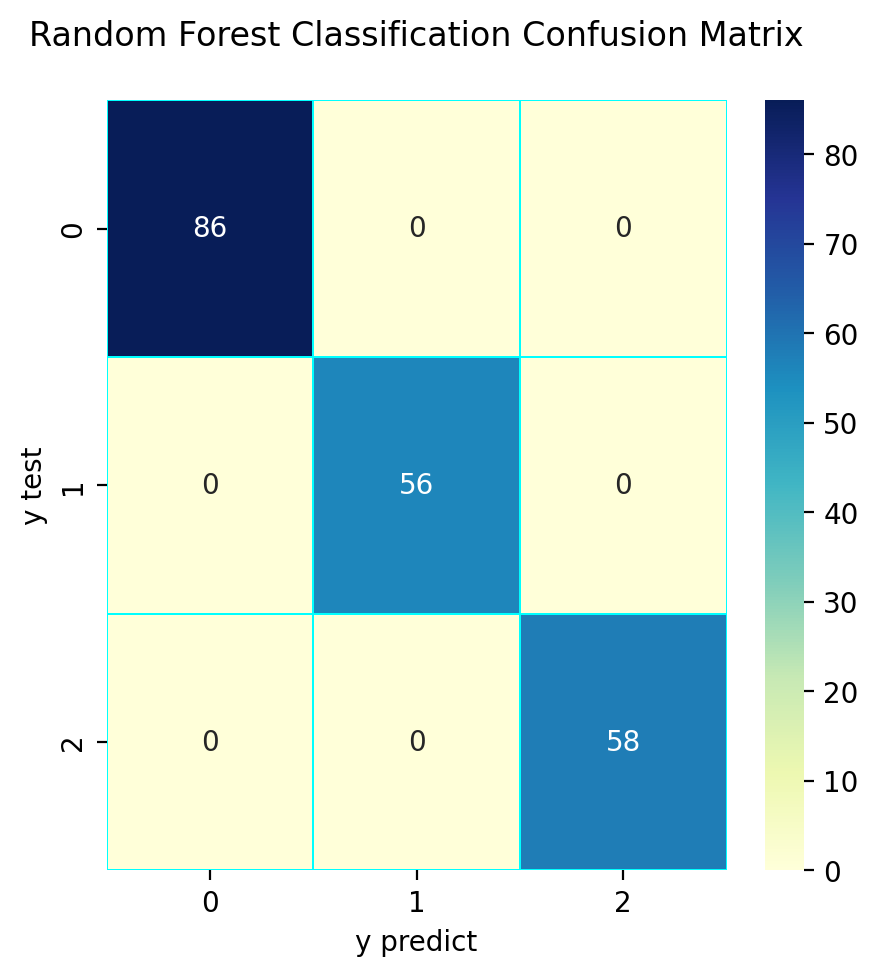

In [25]:
rfcla_cm = confusion_matrix(y_test, y_predict_rf)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(rfcla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Random Forest Classification Confusion Matrix\n')
plt.xlabel('y predict')
plt.ylabel('y test')
plt.show()

**Random forest score**

In [26]:
score_rf = rf.score(X_test, y_test)
print('Random Forest Score = ', score_rf)

Random Forest Score =  1.0


In [27]:
print(classification_report(y_test, y_predict_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        86
           1       1.00      1.00      1.00        56
           2       1.00      1.00      1.00        58

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



# **Cluster**

In [28]:
X = df.drop('level', axis=1)
y = df['level']
# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
# Khởi tạo và huấn luyện K-Means trên tập huấn luyện
kmeans = KMeans(n_clusters=3, random_state=42)  # Bạn có thể điều chỉnh số lượng cụm
model = kmeans.fit(X_train_scaled)
predictions = model.labels_
# Dự đoán nhãn cụm cho dữ liệu huấn luyện và kiểm tra
train_clusters = kmeans.predict(X_train_scaled)
test_clusters = kmeans.predict(X_test_scaled)

# Thêm nhãn cụm vào DataFrame
X_train['cluster'] = train_clusters
X_test['cluster'] = test_clusters

# Hiển thị số lượng mẫu trong mỗi cụm
print("Train Set Cluster Counts:")
print(X_train['cluster'].value_counts())
print("\nTest Set Cluster Counts:")
print(X_test['cluster'].value_counts())

X_train.drop(columns='cluster',axis=1)
X_test.drop(columns='cluster',axis=1)

Train Set Cluster Counts:
1    365
2    293
0    142
Name: cluster, dtype: int64

Test Set Cluster Counts:
2    82
1    80
0    38
Name: cluster, dtype: int64


c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,age,gender,air_pollution,alcohol_use,dust_allergy,occupational_hazards,genetic_risk,chronic_lung_disease,balanced_diet,obesity,...,coughing_of_blood,fatigue,weight_loss,shortness_of_breath,wheezing,swallowing_difficulty,clubbing_of_finger_nails,frequent_cold,dry_cough,snoring
index,,,,,,,,,,,,,,,,,,,,,
521,48,2,1,6,7,8,7,6,7,7,...,7,3,2,6,4,2,3,1,2,1
737,62,1,6,8,7,7,7,6,2,4,...,3,2,7,6,5,1,9,3,4,2
740,22,1,6,8,7,7,7,6,2,4,...,3,2,7,6,5,1,9,3,4,2
660,37,2,7,7,7,7,6,7,7,7,...,8,4,2,3,1,4,5,6,7,5
411,46,2,1,6,7,5,3,2,6,2,...,2,3,3,7,7,4,8,7,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,35,1,2,1,5,3,2,3,2,4,...,4,6,7,2,5,8,1,3,2,3
332,18,2,6,8,7,7,7,6,7,7,...,9,3,2,4,1,4,2,4,2,3
208,28,1,6,7,7,7,7,6,7,7,...,7,5,3,2,7,8,2,4,5,3


In [30]:
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
model = kmeans.fit(X_scaled)
predictions = model.labels_
clusters=pd.DataFrame(X_scaled, columns=X.columns)
clusters['label']=predictions
polar=clusters.groupby("label").mean().reset_index()
polar=pd.melt(polar,id_vars=["label"]).dropna()
px.line_polar(polar,r="value",theta="variable",color="label",line_close=True,height=600,width=800)

c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [31]:
# Đánh giá trên tập huấn luyện
labels_true = y_train.to_numpy()
labels_pred = train_clusters

silhouette_train = silhouette_score(X_train, labels_pred, metric='euclidean')
print("Silhouette: " + str(silhouette_train))
print('\n')
prec_train = precision_score(labels_true, labels_pred, average='macro')
print("Precision: " + str(prec_train))

rec_train = recall_score(labels_true, labels_pred, average='macro')
print("Recall: " + str(rec_train))

f1_train = f1_score(labels_true, labels_pred, average='macro')
print("F-measure: " + str(f1_train))

Silhouette: 0.18684290756981195


Precision: 0.43506110924903924
Recall: 0.46391591526948955
F-measure: 0.4270148275968442


## Trực quan hóa kết quả dùng 2 thuộc tính `coughing_of_blood` và `passive_smoker`

c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



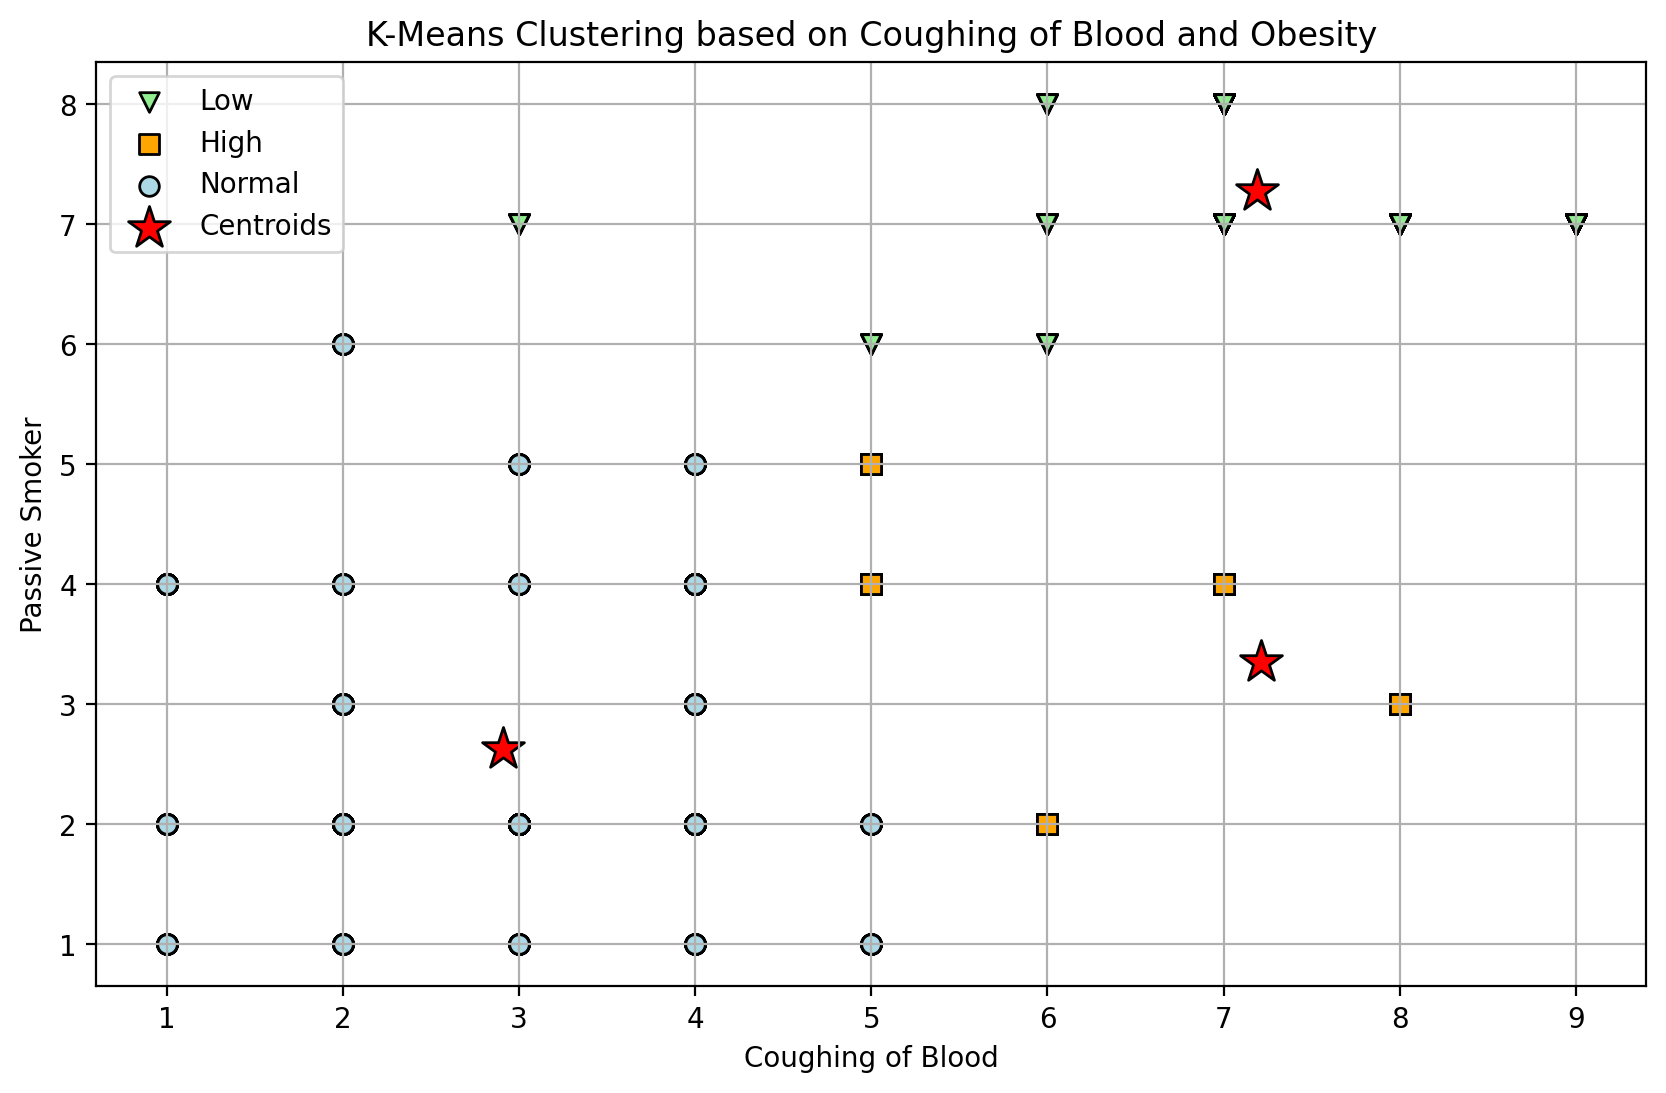

In [32]:
X = df[['coughing_of_blood', 'passive_smoker']]

# Sử dụng thuật toán KMeans để phân tích
kmeans = KMeans(n_clusters=3)  # Số lượng cluster có thể thay đổi
kmeans.fit(X)

# Gán nhãn cho từng điểm dữ liệu
labels = kmeans.predict(X)

# Tính toán trung tâm của mỗi cluster
centers = kmeans.cluster_centers_

# Tìm khoảng cách từ mỗi điểm đến trung tâm của cluster gần nhất
distances = kmeans.transform(X)
min_distances = np.min(distances, axis=1)

# Tùy chỉnh màu sắc cho các cluster
colors = ['lightgreen', 'orange', 'lightblue']

# Tên của các cluster
cluster_names = ['Low', 'High', 'Normal']

marker = ['v', 's', 'o']

# Vẽ đồ thị trực quan hóa
plt.figure(figsize=(10, 6))

# Vẽ các điểm dữ liệu trong từng cluster
for i in range(len(centers)):
    plt.scatter(X[labels == i]['coughing_of_blood'], X[labels == i]['passive_smoker'],s=50, label=cluster_names[i], c=colors[i],marker=marker[i], edgecolor='black')

# Vẽ trung tâm của từng cluster
plt.scatter(centers[:, 0],centers[:, 1],s=250, marker='*',c='red', edgecolor='black',label='Centroids')

plt.xlabel('Coughing of Blood')
plt.ylabel('Passive Smoker')
plt.title('K-Means Clustering based on Coughing of Blood and Obesity')
plt.legend()
plt.grid(True)
plt.show()

# **SVM**

In [33]:
from sklearn.model_selection import GridSearchCV
svm = SVC()
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4],
    
}
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
best=grid_search.best_params_
print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", grid_search.best_score_)

Best parameters found:  {'C': 0.001, 'degree': 3, 'gamma': 'auto', 'kernel': 'poly'}
Best score found:  1.0


In [34]:
svm_model = SVC(**best)
svm_model.fit(X_train, y_train)
y_predict4 = svm_model.predict(X_test)

**Confusion Matrix**

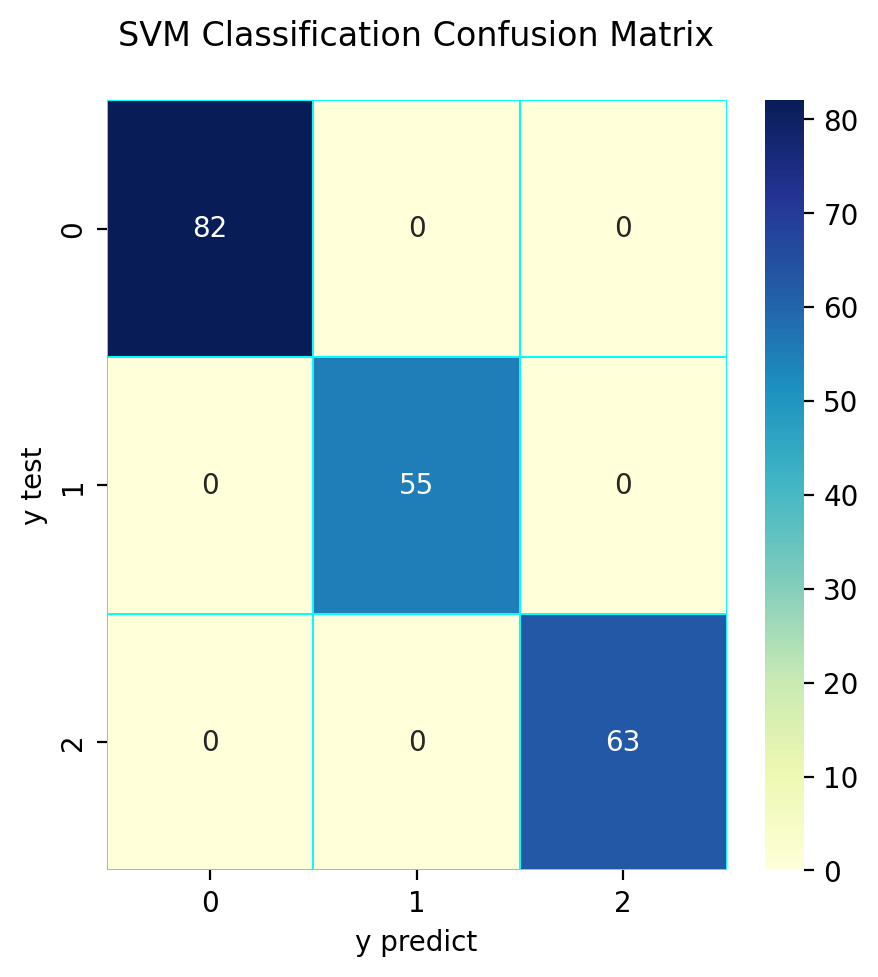

In [35]:
svm_cm = confusion_matrix(y_test, y_predict4)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(svm_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('SVM Classification Confusion Matrix\n')
plt.xlabel('y predict')
plt.ylabel('y test')
plt.show()

**Test Score**

In [36]:
# Điểm số trên tập test
score_svm = svm_model.score(X_test, y_test)
print('SVM Score = ', score_svm)

# Báo cáo phân loại (Classification Report)
print('\nClassification Report for SVM\n')
print(classification_report(y_test, y_predict4))

SVM Score =  1.0

Classification Report for SVM

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        63

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



# **KNN**

Text(0, 0.5, 'Accuracy')

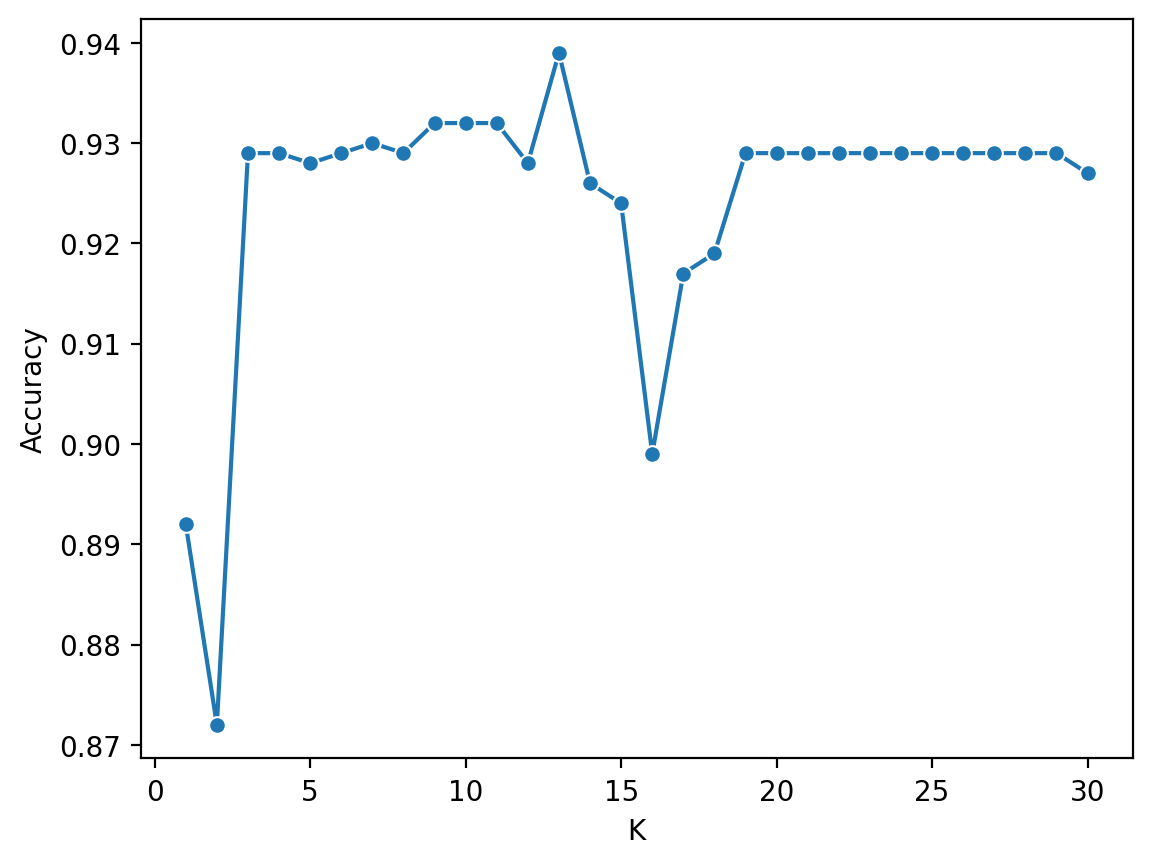

In [37]:
from sklearn.model_selection import cross_val_score

scaler=StandardScaler()
k_values = [i for i in range (1,31)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, scaler.fit_transform(X), y, cv=5)
    scores.append(np.mean(score))

sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K")
plt.ylabel("Accuracy")

In [38]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train , y_train)
print(classification_report(y_test, model_knn.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      0.98      0.99        55
           2       0.98      1.00      0.99        63

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



# **ANN**

In [39]:
model = keras.Sequential([
    keras.layers.Dense(64, activation = 'relu', input_shape = (X_train.shape[1],)),
    keras.layers.Dense(32, activation = 'relu'),
    keras.layers.Dense(3, activation = 'softmax')
])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [40]:
model.fit(X_train, y_train, epochs = 100, batch_size = 50, validation_split = 0.2)

Epoch 1/100
13/13 [==============================] - 1s 17ms/step - loss: 1.5375 - accuracy: 0.4047 - val_loss: 0.9047 - val_accuracy: 0.5750
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.8946 - accuracy: 0.5578 - val_loss: 0.7154 - val_accuracy: 0.6687
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 0.7661 - accuracy: 0.6375 - val_loss: 0.6878 - val_accuracy: 0.6812
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6663 - accuracy: 0.6734 - val_loss: 0.5754 - val_accuracy: 0.7188
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 0.5868 - accuracy: 0.7281 - val_loss: 0.5341 - val_accuracy: 0.7375
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 0.5284 - accuracy: 0.7672 - val_loss: 0.4812 - val_accuracy: 0.7937
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 0.4763 - accuracy: 0.8125 - val_loss: 0.4468 - val_accuracy: 0.8062
Epoch 8/100


In [41]:
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis = 1)

accuracy = accuracy_score(y_test, y_pred_labels)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

7/7 [==============================] - 0s 1ms/step
Test Accuracy: 100.00%


# **Khai phá luật kết hợp**

In [42]:
# Load the lung cancer dataset
df = pd.read_csv("cancer.csv", index_col='index')
df.drop("Patient Id", axis=1, inplace=True)
df.drop("Age", axis=1, inplace=True)
df["Level"].replace({'High': 2, 'Medium': 1, 'Low': 0}, inplace=True)
# df = df.apply(lambda x: (x > 4).astype(int), axis=1)

# Convert categorical variables to binary dummy variables
df = pd.get_dummies(df, columns=['Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy',
                                 'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease',
                                 'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker',
                                 'Chest Pain', 'Coughing of Blood', 'Fatigue', 'Weight Loss',
                                 'Shortness of Breath', 'Wheezing', 'Swallowing Difficulty',
                                 'Clubbing of Finger Nails', 'Frequent Cold', 'Dry Cough', 'Snoring'])

df_bool = df.astype(bool)

# Find frequent itemsets using the apriori algorithm
frequent_itemsets = apriori(df_bool, min_support=0.1, use_colnames=True)

# Generate association rules from the frequent itemsets
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

consequents_criteria = frozenset(['Level'])

# Lọc các luật kết hợp với consequents cụ thể
filtered_rules = rules[rules['consequents'] == consequents_criteria]

# Print the top 10 rules by lift
print(filtered_rules.sort_values(by='lift', ascending=False).head(10).to_string())


                                                                                                        antecedents consequents  antecedent support  consequent support  support  confidence     lift  leverage  conviction  zhangs_metric
92746              (OccuPational Hazards_7, Air Pollution_6, Chest Pain_7, chronic Lung Disease_6, Frequent Cold_4)     (Level)               0.100               0.697    0.100         1.0  1.43472  0.030300         inf       0.336667
177058            (Gender_1, Air Pollution_6, Chest Pain_7, Genetic Risk_7, chronic Lung Disease_6, Dust Allergy_7)     (Level)               0.120               0.697    0.120         1.0  1.43472  0.036360         inf       0.344318
173782             (OccuPational Hazards_7, Gender_1, Air Pollution_6, Chest Pain_7, Dust Allergy_7, Alcohol use_7)     (Level)               0.117               0.697    0.117         1.0  1.43472  0.035451         inf       0.343148
173908                          (Obesity_7, Gender_1, Air Po